# Modelos autorregresivos integrados de media móvil (ARIMA)

- En el capítulo anterior se trataron las técnicas de predicción basadas en el suavizado exponencial, que se basan en el supuesto de que `las series temporales se componen de términos deterministas y estocásticos`. El componente aleatorio se reduce a cero con el número de observaciones consideradas para la predicción. Esto supone que el ruido aleatorio es realmente aleatorio y sigue una distribución idéntica e independiente. Sin embargo, esta suposición tiende a violarse a menudo y `el suavizado no es suficiente para modelar el proceso y establecer un modelo de predicción`.

- En estos casos, los `modelos autorregresivos` pueden ser muy útiles, ya que `se ajustan inmediatamente utilizando valores de retardo previos aprovechando la correlación serial inherente entre las observaciones`. En esta sección se presentan los conceptos de predicción mediante `modelos autorregresivos`. El `modelo autorregresivo incluye términos autorregresivos o términos de media móvil`. En función de los componentes utilizados, existen múltiples enfoques que pueden utilizarse en predicciones con series temporales, como la `media móvil (MA)`, la `media móvil autorregresiva (ARMA)` y `media móvil integrada autorregresiva (ARIMA)`. 

- La presente sección se centra en el `modelo autorregresivo` y cubrirá los siguientes temas:
<br/>
    - `Media móvil (MA)`
    - `Autorregresivo (AR)`
    - `Media móvil autorregresiva (ARMA)`
    - `Media móvil integrada autorregresiva (ARIMA)`

- El concepto de modelos autorregresivos en series temporales se refiere a los `modelos que se desarrollan haciendo una regresión sobre valores anteriores`. Por ejemplo, $y_{t}$ es la respuesta en el tiempo $t$ y el modelo se desarrolla como sigue

$$
y_{t}=\phi y_{t-1}+\varepsilon_{t}
$$

- La ecuación anterior es un ejemplo sencillo de un modelo `AR(1)`. Aquí, $\phi$ es el `coeficiente del modelo` y $\varepsilon_{t}$ es el error. Además, de forma similar al modelo de regresión, `la normalidad del error se mantiene para un modelo autorregresivo`, así como la consideración de `estacionariedad u homocedasticidad`. La siguiente subsección introduce los `modelos de media móvil`, que son una `dependencia lineal de la desviación histórica de los modelos respecto al valor anterior`

## Modelos autorregresivos

- Un enfoque bastante usado para la regresión de datos de series temporales es la `regresión con su término de rezago`. Este género de modelos se denomina `modelos autorregresivos (AR)`. Los modelos $AR$ son son destacados al `capturar tendencias`, ya que los `próximos valores temporales se predicen basándose en valores temporales previos`. Por lo tanto, los modelos $AR$ son muy `útiles en situaciones en las que el siguiente valor pronosticado es una función del periodo de tiempo anterior`, como un aumento del precio medio de las acciones debido a un buen crecimiento de la empresa; esperamos que el efecto se mantenga en el tiempo y el precio debería seguir aumentando en función del tiempo como el componente de tendencia.

- El `modelo autorregresivo` de orden $p$ se define como $AR(p)$, donde $p$ es el orden del componente $AR$
<br/>
    - El modelo $AR$ de primer orden se denomina `AR(1)`:

    $$
    \\[1mm]
    y_{t}=\phi y_{t-1}+\varepsilon_{t}
    $$

    - El modelo $AR$ de segundo orden se denomina `AR(2)`:

    $$
    \\[1mm]
    y_{t}=\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\varepsilon_{t}
    $$

    - El modelo $AR$ de orden $p^{\text{th}}$ se denomina `AR(p)`:

    $$
    \\[1mm]
    y_{t}=\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}+\varepsilon_{t}
    $$

- Aquí, $\phi$ es el `coeficiente del modelo`, $\varepsilon_{t}\sim N(0, \sigma^{2})$ es el `error en el tiempo` $t$, y $p$ es el `orden del modelo` $AR$. Estudiemos implicaciones de los modelos de componentes $AR$. El conjunto de datos `AR(1)` puede ser generado utilizando la función `arma_generate_sample` del módulo `statsmodels.tsa`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa
import statsmodels.tsa.arima.model as arima_model
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf = plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    
    return None

In [3]:
n = 600

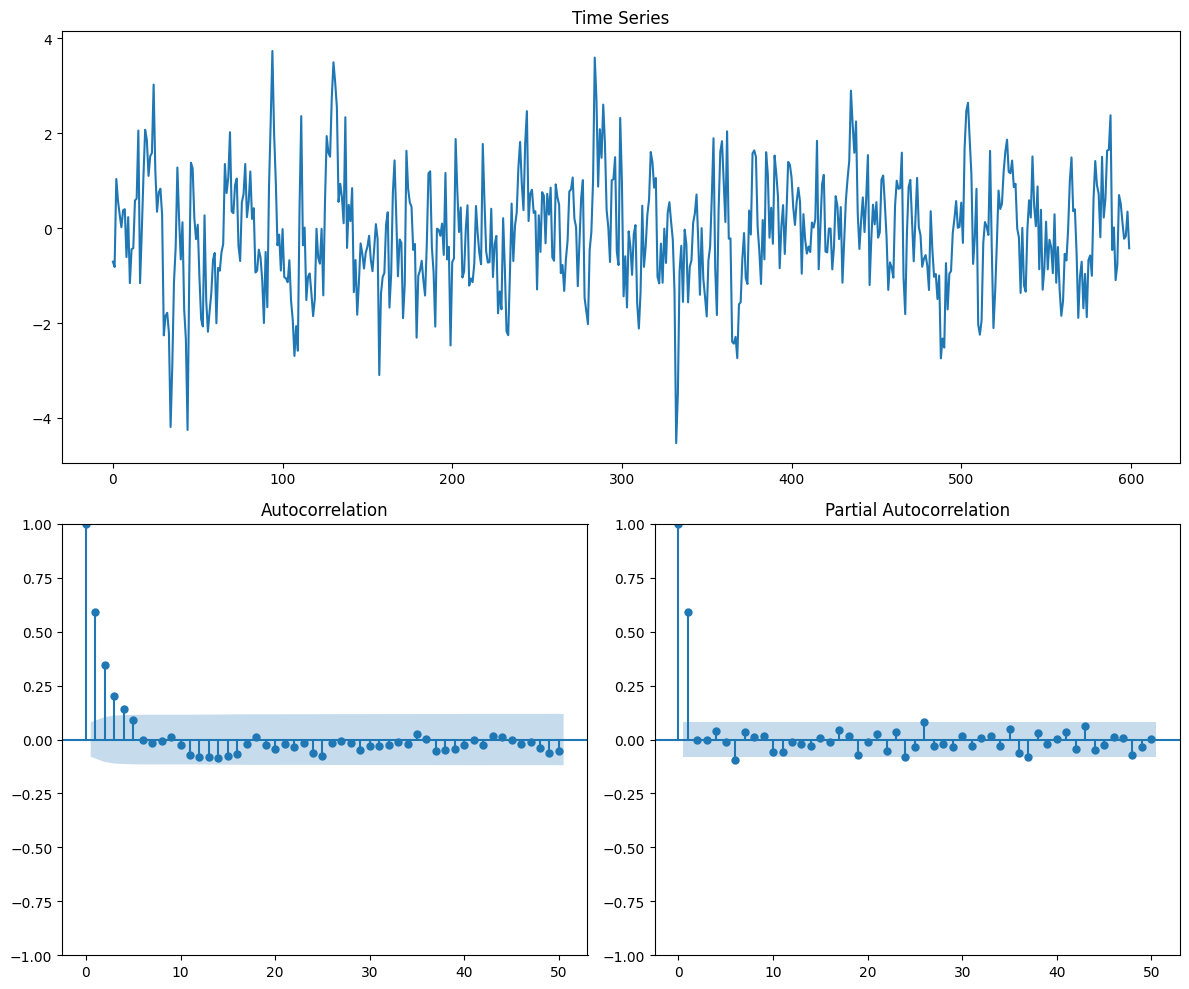

In [4]:
ar = np.r_[1, -0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- El script anterior genera un conjunto de datos para el escenario $AR(1)$ con `correlación serial definida para el retardo anterior como 0.6`. `El componente` $MA$ `se fija en cero para eliminar cualquier efecto de media móvil de la señal de la serie temporal`. También entrega la `autocorrelación` y la `autocorrelación parcial` de la señal generada.

- Considere el siguiente modelo $y_{t}=\phi_{1}y_{t-1}+\varepsilon_{t}$. `Los datos son simulados usando componentes autoregresivas menores que 1`, por lo tanto, `la autocorrelación decrecerá sobre el tiempo siguiendo la relación entre` $\phi$ y $t$

$$
y_{t}=\phi y_{t-1}+\varepsilon_{t}=\phi (\phi y_{t-2} + \varepsilon_{t-1})+\varepsilon_{t}=\phi^{2}y_{t-2}+\phi\varepsilon_{t-1}+\varepsilon_{t}=\cdots
$$

````{admonition} Proceso estacionario
:class: tip

Una `serie de tiempo es estacionaria si su media, varianza y autocovarianza (en
diferentes rezagos) permanecen iguales sin importar el momento en el cual se midan`; es decir, son invariantes respecto al tiempo. Si $(y_{t})_{t=1}^{T}$ es una `serie de tiempo estacionaria` entonces:

$$
\begin{align*}
\textsf{E}(y_{t})&=\textsf{E}(y_{t+k})=\mu\\
\textsf{V}(y_{t})&=\textsf{V}(y_{t+k})=\sigma^{2}\\
\gamma_{k}&=\textsf{E}\left[(y_{t}-\mu)(y_{t+k}-\mu)\right],
\end{align*}
$$

donde $\gamma_{k}$, es la autocovarianza en el rezago $k$.
````

- Por lo tanto, el `gráfico ACF decrece exponencialmente y la PACF remueve el efecto de rezago mientras calcula correlación, solo términos significativos son capturados`. El valor de $\boldsymbol{\Phi}$ `afecta la estacionariedad de la señal`. El siguiente vídeo le muestra como usar Excel para calcular la `ACF` y compararla con la que entrega `Python` (ver [ACF en Excel](https://www.youtube.com/watch?v=H3iHEJkh3A8&t=451s)). Por ejemplo, si aumentamos el valor de $\phi$ de 0.6 a 0.95 en $AR(1)$, el modelo tiende a la no estacionariedad, como se muestra en el siguiente ejemplo:

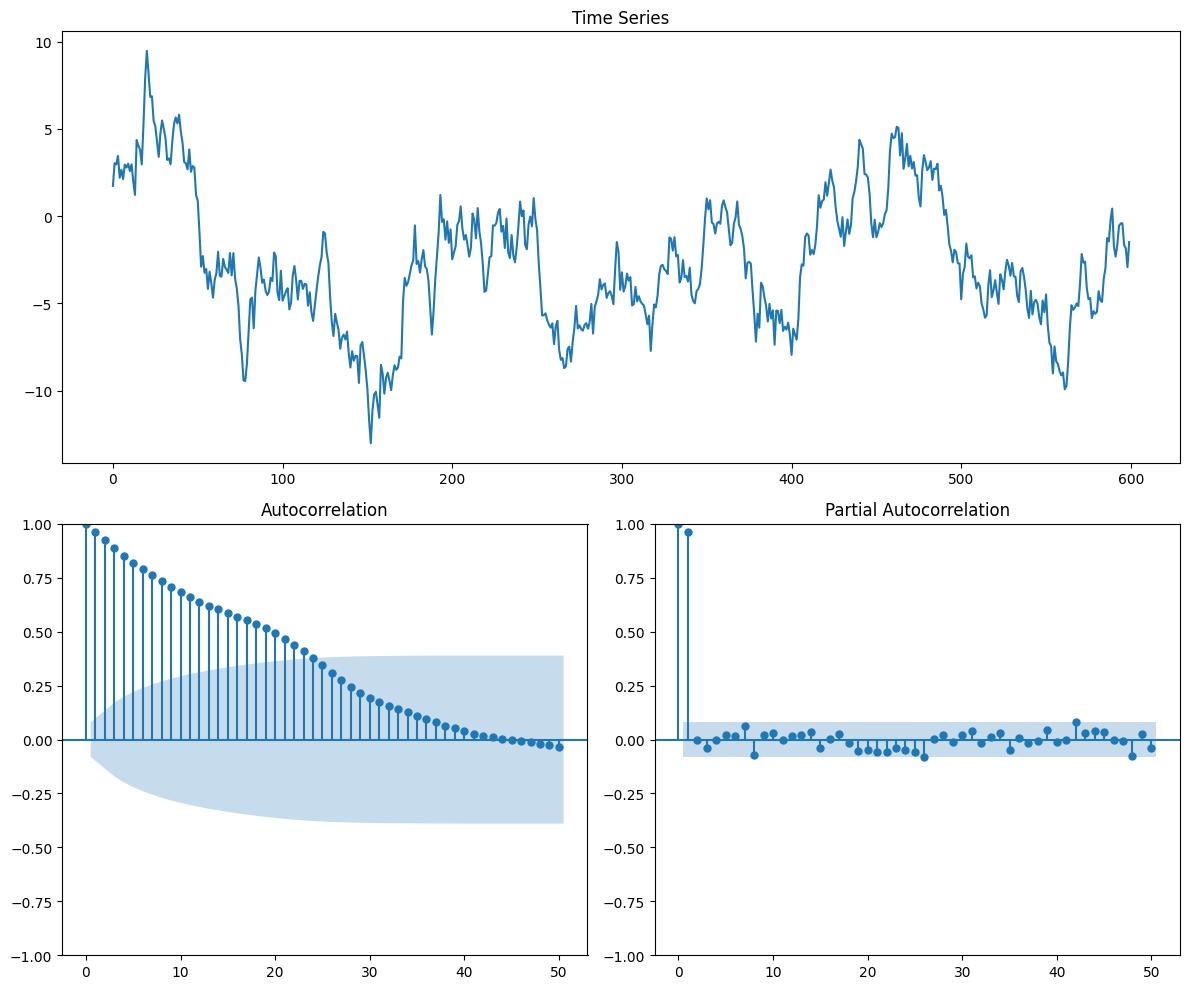

In [5]:
ar = np.r_[1, -0.95]++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- En el escenario en que $\phi>1$, `el modelo se convierte en no estacionario`. Un ejemplo de proceso no estacionario con $\phi>1$ lo podemos ver a continuación, considerando $\phi=1.01$

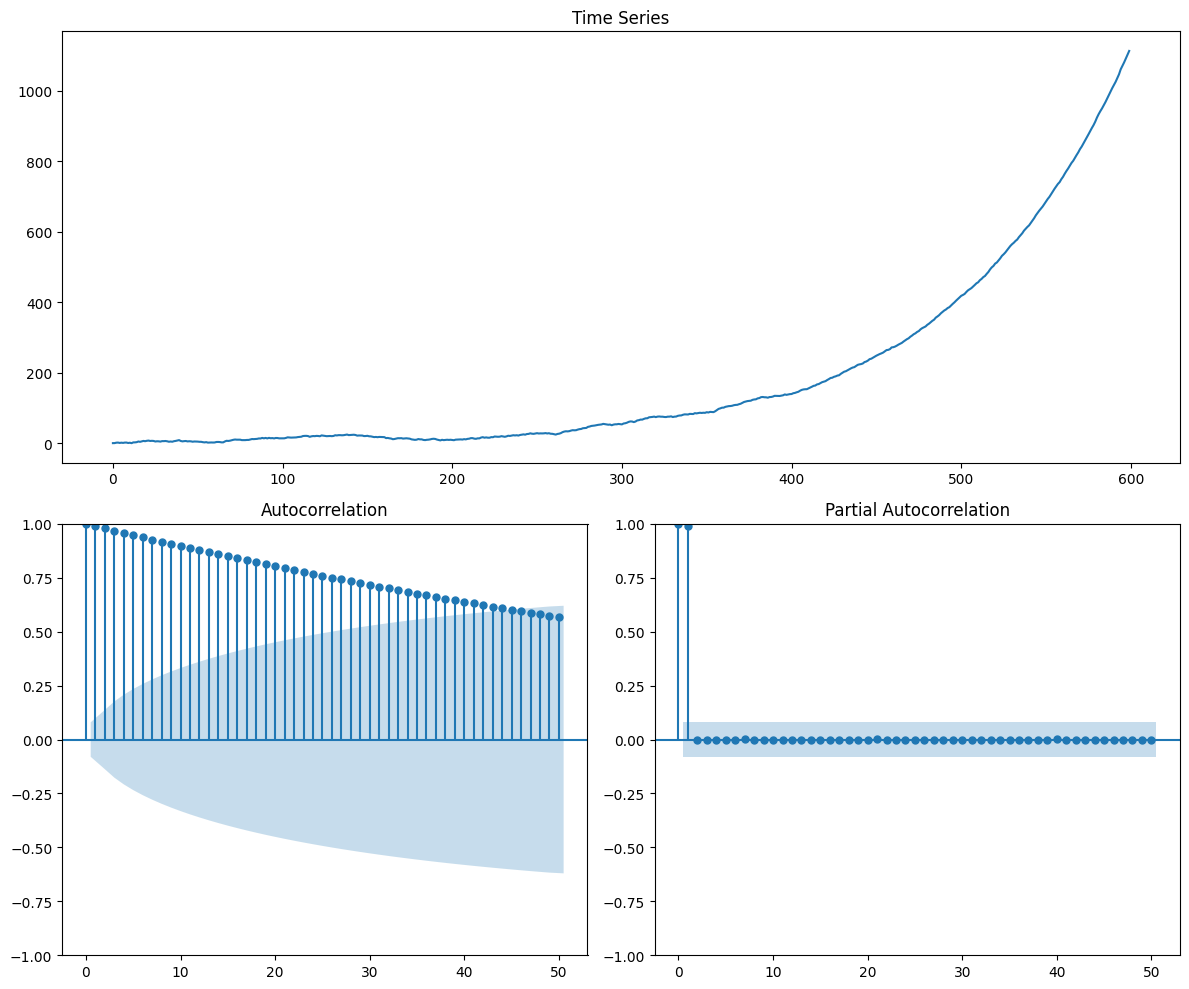

In [6]:
ar = np.r_[1, -1.01]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Similarmente, `modelos autorregresivos de alto orden`, pueden ser generados para validar efecto sobre los componentes de la `PACF` con el orden. Los conjuntos de datos con componentes $AR(2)$ y $AR(3)$ son generados utilizando el siguiente script

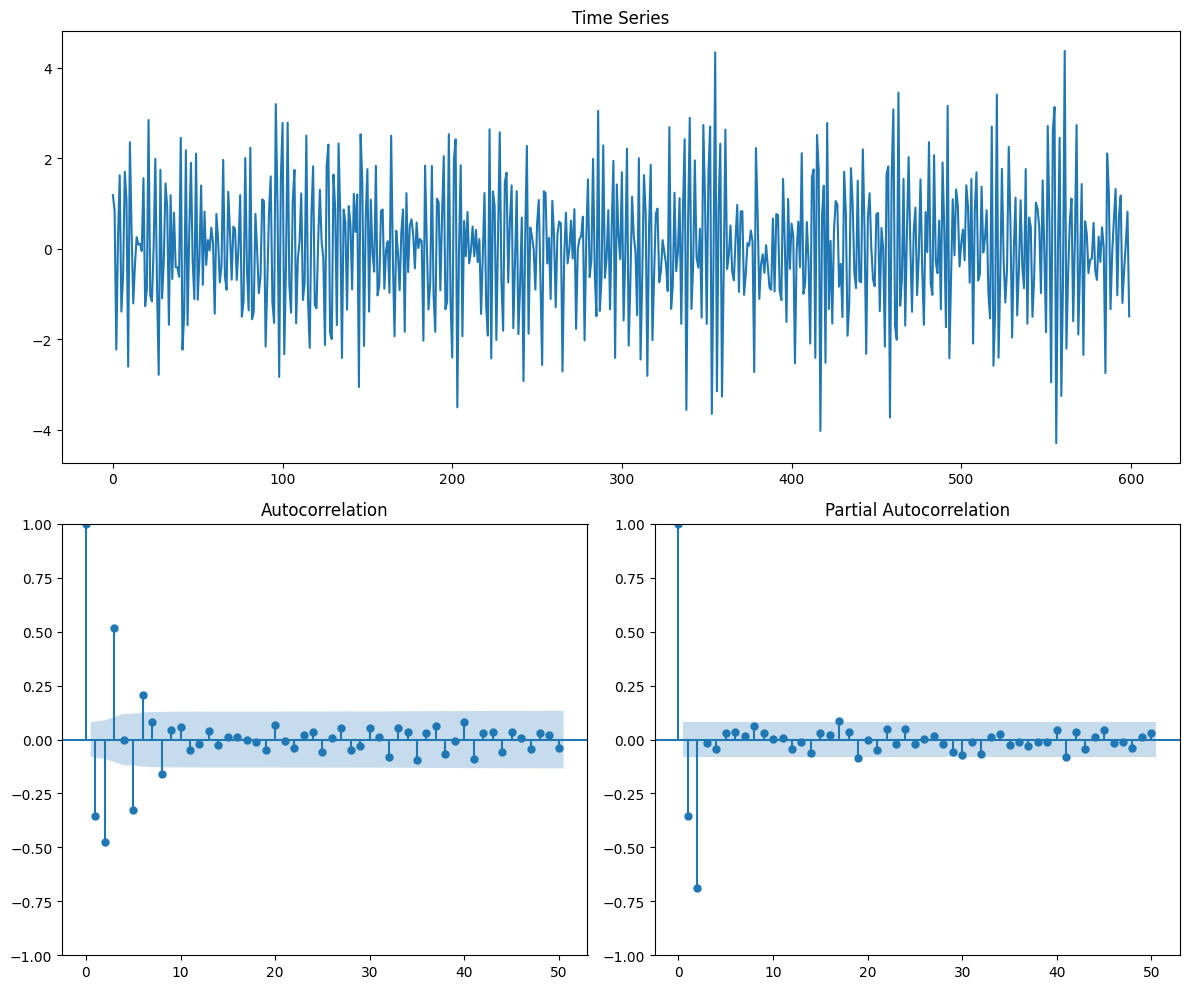

In [7]:
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

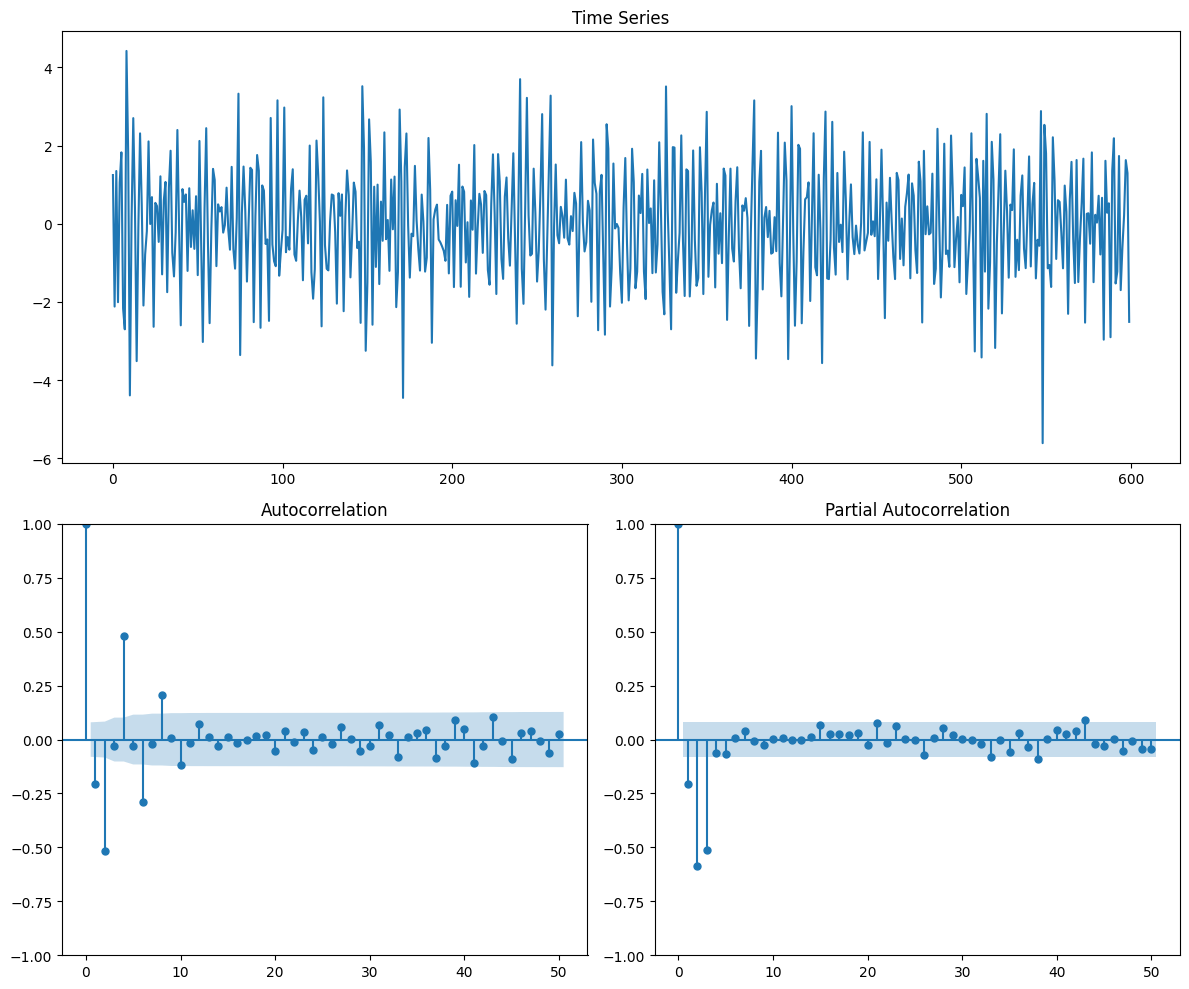

In [8]:
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)

- Como se puede ver, a partir de diferentes fuentes de datos, la `PACF está capturando la componente autorregresiva` y $q$ es el valor donde esta es significante. 

- El modelo para $AR(3)$ puede ser evaluado usando la clase `ARIMA.fit` del modulo de `Python`, `statsmodels.tsa.api` (ver [statsmodels.tsa.arima.model.ARIMA](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima.model.ARIMA.html)). El modelo $AR(3)$ sobre los datos generados con $AR$, con el actual rezago generado, `correlaciones de 0.6, 0.7 y 0.5` aproximadamente, los cuales se pueden visualizar en el siguiente `resumen`, y son parecidos a la relación real obtenida en el ejemplo anterior usando `smtsa.arma_generate_sample`

In [9]:
ar3 = arima_model.ARIMA(ar3_data.tolist(), order=(3, 0, 0)).fit()
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -862.204
Date:                Fri, 31 Mar 2023   AIC                           1734.408
Time:                        14:26:26   BIC                           1756.392
Sample:                             0   HQIC                          1742.966
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0132      0.015     -0.904      0.366      -0.042       0.015
ar.L1         -0.6230      0.036    -17.227      0.000      -0.694      -0.552
ar.L2         -0.7494      0.032    -23.498      0.000      -0.812      -0.687
ar.L3         -0.5079      0.038    -13.197      0.000      -0.583      -0.432
sigma2         1.0337      0.056     18.556      0.000       0.925       1.143
===================================================================================
Ljung-Box (L1) (Q):                   0.54   Jarque-Bera (JB):                 9.49
Prob(Q):                              0.46   Prob(JB):                         0.01
Heteroskedasticity (H):               0.97   Skew:                            -0.23
Prob(H) (two-sided):                  0.83   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**`Summary output`**

- En el presente resumen, `Covariance Type:	opg` corresponde a la estimación por producto exterior de gradientes `Outer-Product-of-Gradients (OPG)` para la matriz de covarianza asociada a las estimaciones de coeficientes del modelo. 

- El `AIC, BIC, HQIC` utilizan la estimación de máxima verosimilitud (`Log Likelihood`) de un modelo como medida de ajuste. Los valores de `AIC, BIC, HQIC` son bajos para los modelos con `Log Likelihood` altos. Esto significa que el modelo se ajusta mejor a los datos, que es lo que queremos. Por ejemplo `AIC` se define de la siguiente forma: $AIC=2k-2\ln(L)$, donde $k$ es el `número de parámetros` en el modelo estadístico , y $L$ es el `máximo valor de la función de verosimilitud` para el modelo estimado. 

- Al ajustar modelos, es posible `aumentar la verosimilitud añadiendo parámetros`, pero `hacerlo puede dar lugar a un sobreajuste`. Tanto el `BIC como el AIC` intentan resolver este problema `introduciendo un término de penalización por el número de parámetros del modelo`; el término de penalización es mayor en el `BIC` que en el `AIC` para tamaños de muestra superiores a 7. `BIC` esta definido como $BIC=k\ln(n)-2\ln(L)$, donde aquí $n$ representa el tamaño de la muestra. El criterio de información de `Hannan–Quinn (HQIC)` está dado por $HQIC=2k\ln(\ln(n))-2\ln(L)$. Este criterio reduce la penalización de `BIC`, de tal forma que en términos de penalización se ubica entre `AIC` y `BIC`. La selección del criterio va a depender del objetivo principal del investigador.

- Los `coeficientes del modelo autorregresivo` son `ar.L1, ar.L2, ar.L3`. El valor de `const` es equivalente al intercepto en modelos de regresión lineal y `sigma2` es la `varianza estimada del residuo en el modelo`. La columna `P>|z|` corresponde al $p$-value. `std err` es el error estándar asociado a cada coeficiente, para los cuales el `intervalo de confianza` aparece en la última columna `[0.025, 0.075]`. 

- Para determinar si la asociación entre la respuesta y cada término del modelo es `estadísticamente significativa`, comparamos el $p$-value del término con su `nivel de significancia` para evaluar la `hipótesis nula`. `La hipótesis nula es que el término no es significativamente diferente de 0`, lo que indica que `no existe asociación entre el término y la respuesta`. `Nótese que los coeficientes: ar.L1, ar.L2, ar.L3, son estadísticamente significativos.` Cuando un coeficiente no es estadísticamente significativo, es posible que desee volver a ajustar el modelo sin el término asociado.

- El siguiente paso es `determinar si el modelo cumple el supuesto del análisis`. Utilizamos el `estadístico chi-cuadrado de Ljung-Box (Ljung-Box (L1) (Q))`, el $p$-value asociado `Prob(Q)` y la `función de autocorrelación de los residuos` para determinar si el modelo cumple el supuesto de que `los residuos son independientes`. Si no se cumple el supuesto, `es posible que el modelo no se ajuste correctamente a los datos` y debe tener cuidado al interpretar los resultados. En este caso la `hipótesis nula es que los residuos son independientes o que no hay correlación en los residuales`. Nótese que el $p$-value es mayor o igual que 0.05, y está representado por `Prob(Q)`. 

- Por otro lado `Jarque-Bera (JB)` es un `test de normalidad`, en este caso para los residuales. La hipótesis nula a contrastar es que `los residuales están normalmente distribuidos`. Nótese también que en este caso el $p$-value (`Prob(JB)`) es mayor al nivel de significancia. El sesgo y la curtosis `Skew, Kurtosis` muestran un sesgo negativo en los residuales y una distribución `leptocúrtica` con mayor concentración de los datos en torno a la media.

- El valor `Heteroskedasticity (H)` es el estadístico asociado con el test de heterocedasticidad de los residuos estandarizados con $p$-value `Prob(H) (two-sided)`. La `hipótesis nula es, los residuos no presentan heteroscedasticidad`. Nótese que el $p$-value es mayor o igual que 0.05, y está representado por `Prob(H) (two-sided)`. 

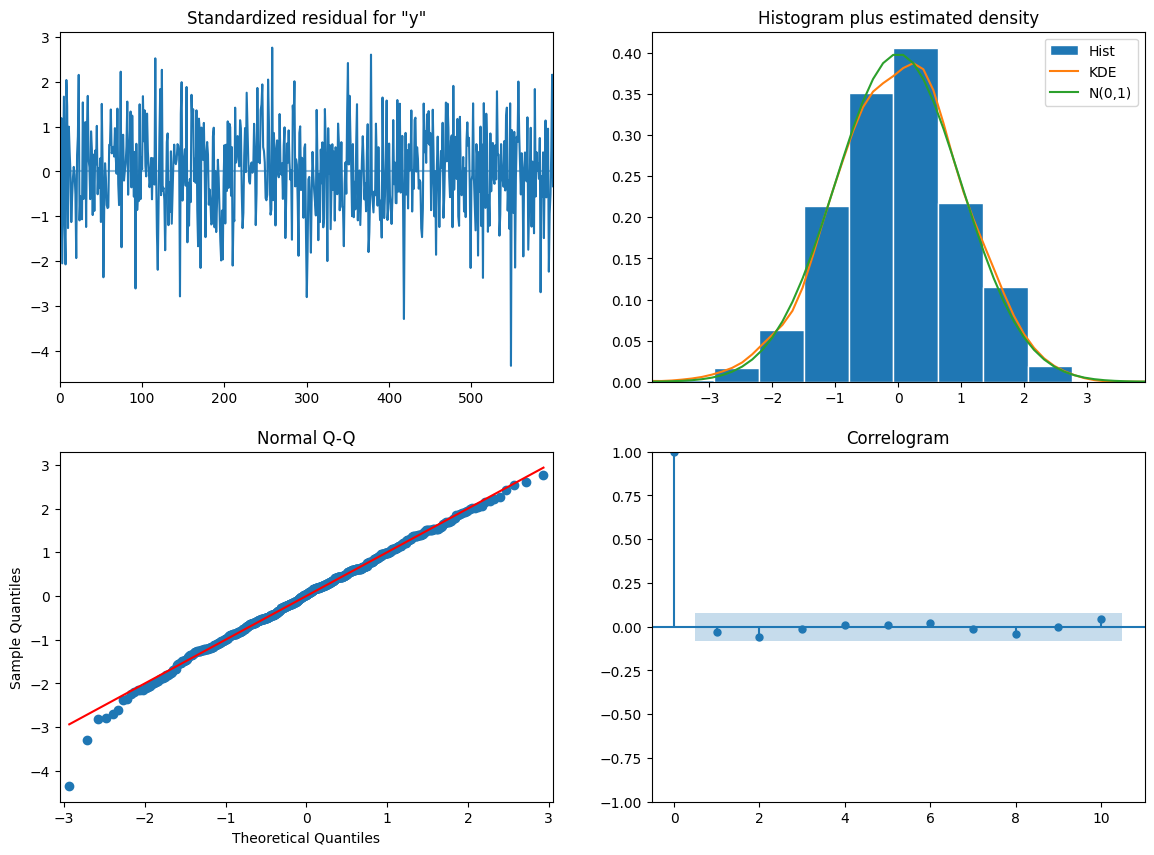

In [10]:
ar3.plot_diagnostics(figsize=(14,10));

- Nótese que en la `ACF no hay correlaciones significativas`, puede concluir que `los residuos son independientes`. Esto es, ninguna de las correlaciones de la función de autocorrelación de los residuos es significativa. `Se puede concluir que el modelo cumple el supuesto de que los residuos son independientes`.

- Tanto $AR$ como $MA$ pueden utilizarse para corregir la dependencia serial, pero normalmente la `autocorrelación positiva se corrige utilizando modelos` $AR$ y la `dependencia negativa se corrige utilizando` modelos $MA$.

## Modelos de media móvil

- Los `modelos de media móvil` utilizan la `dependencia entre los errores residuales` para predecir los valores en el siguiente periodo de tiempo. El modelo le `ayuda a ajustarse a cualquier acontecimiento imprevisible`, como por ejemplo, `acontecimientos catastróficos que provoquen un desplome del mercado de valores`, el cual se producirá a lo largo del tiempo y que se capta como un `proceso de media móvil`.

- La `media móvil de primer orden`, denominada `MA(1)`, es la siguiente:

$$
y_{t}=\alpha-\theta_{1}\varepsilon_{t-1}+\varepsilon_{t}
$$

- La `media móvil de segundo orden`, denominada `MA(2)`, es la siguiente:

$$
y_{t}=\alpha-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}+\varepsilon_{t}
$$

- La `media móvil de orden` $q$, denominada $MA(q)$, es la siguiente:

$$
y_{t}=\alpha-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}-\cdots-\theta_{q}\varepsilon_{t-q}+\varepsilon_{t}
$$

- Aquí, $\varepsilon_{t}$ es el `error idénticamente distribuido de forma independiente en el tiempo` $t$ y sigue una distribución normal $N(0, \sigma_{\varepsilon}^{2})$ con media cero y varianza $\sigma_{\varepsilon}^{2}$ (`white noise`). El componente $\varepsilon_{t}$ representa el error en el tiempo $t$ y las notaciones $\alpha$ y $\varepsilon$ `representan el intercepto medio y los coeficientes de error, respectivamente`. 

$$
\begin{align*}
\textsf{E}(\varepsilon_{n})&=0\\
\textsf{Cov}(\varepsilon_{m}, \varepsilon_{n})&=
\begin{cases}
\sigma_{\varepsilon}^{2},&~\text{si}~m=n\\
0,&~\text{si}~m\neq n
\end{cases}
\end{align*}
$$

- El nombre `"noise"` se debe a que `no hay un patrón, sólo variación aleatoria`, y `"white"` se debe a que `todas las frecuencias están representadas por igual`.

- El modelo de `serie temporal de media móvil de orden` $q$ se representa como $MA(q)$. Las relaciones anteriores no cambian el valor esperado para $MA(q)$, que se define como sigue:

$$
\textsf{E}(y_{t})=\textsf{E}(\alpha-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}-\cdots-\theta_{q}\varepsilon_{t-q}+\varepsilon_{t})=\alpha
$$

- Sin embargo, la varianza aumenta y se define del siguiente modo:

$$
\textsf{Var}(y_{t})=\textsf{Var}(\alpha-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}-\cdots-\theta_{q}\varepsilon_{t-q}+\varepsilon_{t})=
\sigma^2(1+\theta_{1}^{2}+\theta_{2}^{2}+\cdots+\theta_{q}^{2})
$$

- Nótese que a pesar de que se tienen $q$ procesos independientes de ruido blanco $\varepsilon'_{t}$  y $\varepsilon_{t}$. Estos pueden ser sumados: $\eta_{t}=\varepsilon'_{t}+\varepsilon_{t}$. `El hecho de que se puedan sumar, las realizaciones son sólo números, y no significa que estén relacionados entre sí` (es decir, que no sean independientes).

````{admonition} Observación (Cross Validated)
:class: tip

- `¿Por qué molestarse en tomar alguna parte de un ruido blanco anterior` $\theta_{1}\varepsilon_{t-1}$ `para la estimación del siguiente paso temporal, sabiendo que los términos de ruido blanco no están relacionados a lo largo del tiempo?`

`Ejemplo`: *Si un huracán azota Houston, va a haber un impacto en las ventas de, digamos, Target. Desde un alto nivel, esto es un gran valor negativo de $\varepsilon_{t}$ para esa semana. La semana siguiente, habrá otra innovación semanal, $\varepsilon_{t+1}$ pero es posible que el efecto del huracán no haya desaparecido del todo en el límite de la semana, por lo que habrá algún efecto de arrastre sobre las ventas, dado por la innovación de la semana anterior*.

- `¿Por qué la varianza de los términos de innovación se mantiene constante dado que se esperaría que en realidad varíara con el tiempo?`

`Ejemplo`: *Incluso si varía, mientras no varíe por mucho, probablemente sea mejor simplemente modelarlo como una constante en lugar de tratar de estimarlo como un término variable. Por ejemplo, la demanda minorista de plátanos es bastante estable a lo largo del año, excepto en Navidad, cuando es más baja, pero fluctúa de forma errática semana a semana, a nivel de tienda. No podemos predecir exactamente cuál será la demanda la próxima semana, así que modelamos esa imprecisión como ruido blanco.*

````

- Para ilustrar un `modelo de serie temporal de media móvil`, generemos una señal utilizando el siguiente código

In [11]:
import statsmodels.tsa.api as smtsa

- Número de muestras

In [12]:
n = 600

- Generamos un conjunto de datos para $MA(1)$

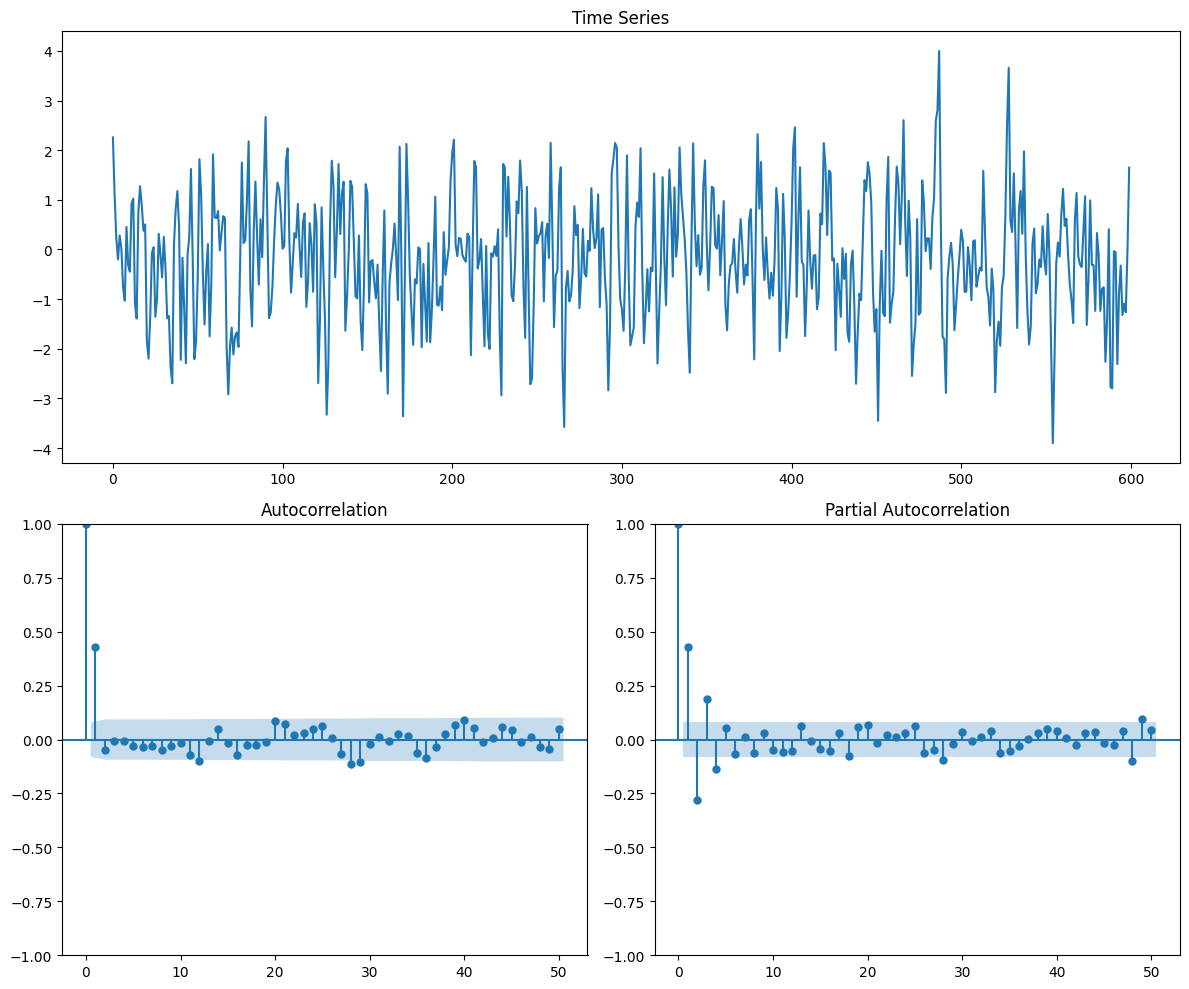

In [13]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma1_data)

- En el script anterior, $n$ representa el número de muestras que se generarán con $AR$ que define el componente autorregresivo y $MA$ `que explica el componente de media móvil de la señal de la serie temporal`. Por ahora, mantendremos el impacto de $AR$ en la señal de la serie temporal como cero. Este script generará un conjunto de datos de series temporales con `una dependencia` $MA(1)$ y `0.7 de correlación serial con el error` y puede ser representado como como sigue:

$$
y_{t}=0.7\varepsilon_{t-1}+\varepsilon_{t}
$$

- Para evaluar si la señal de la serie temporal consta de un componente $MA$ o $AR$, se utiliza la `autocorrelación (ACF)` y la `autocorrelación parcial (PACF)` respectivamente.

- El `ACF` del conjunto de datos anterior muestra una `dependencia de 1 rezago`. Como la relación $MA$ es capturada usando $y_{t} = \theta\varepsilon_{t-1} + \varepsilon_{t}$, que es `independiente de los términos de rezago`, el `ACF tiende a capturar el orden` $q$ apropiado de la serie $MA$.

- Como puede observarse en la siguiente siguiente figura, la `ACF no llega a cero después del orden definido, sino que se reduce a un valor pequeño`. El intervalo de confianza se comprueba utilizando la relación $\pm 2/\sqrt{N}$, donde $1/\sqrt{N}$ `representan una aproximación de la desviación estándar`, que se cumple bajo la condición de independencia.

- Veamos el impacto del componente $MA$ de `ACF` y `PACF` con un orden mayor de $q$ utilizando el siguiente script, el cual generará `series de tiempo de medias moviles de ordenes` $MA(2)$ y $MA(3)$ sin impacto del componente autorregresivo. Además se generan, las funciones `ACF` y `PACF`, como en los anteriores ejemplos

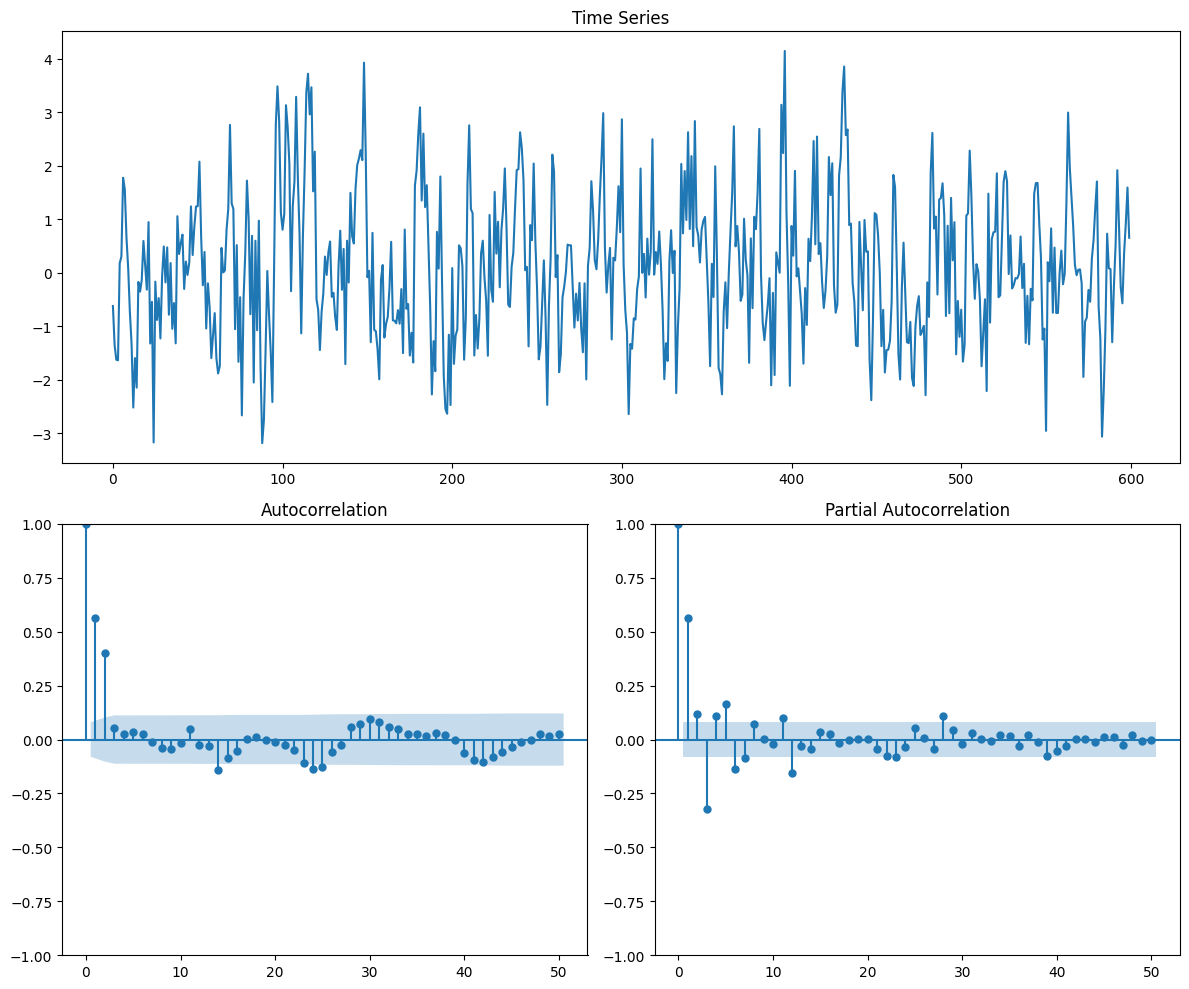

In [14]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

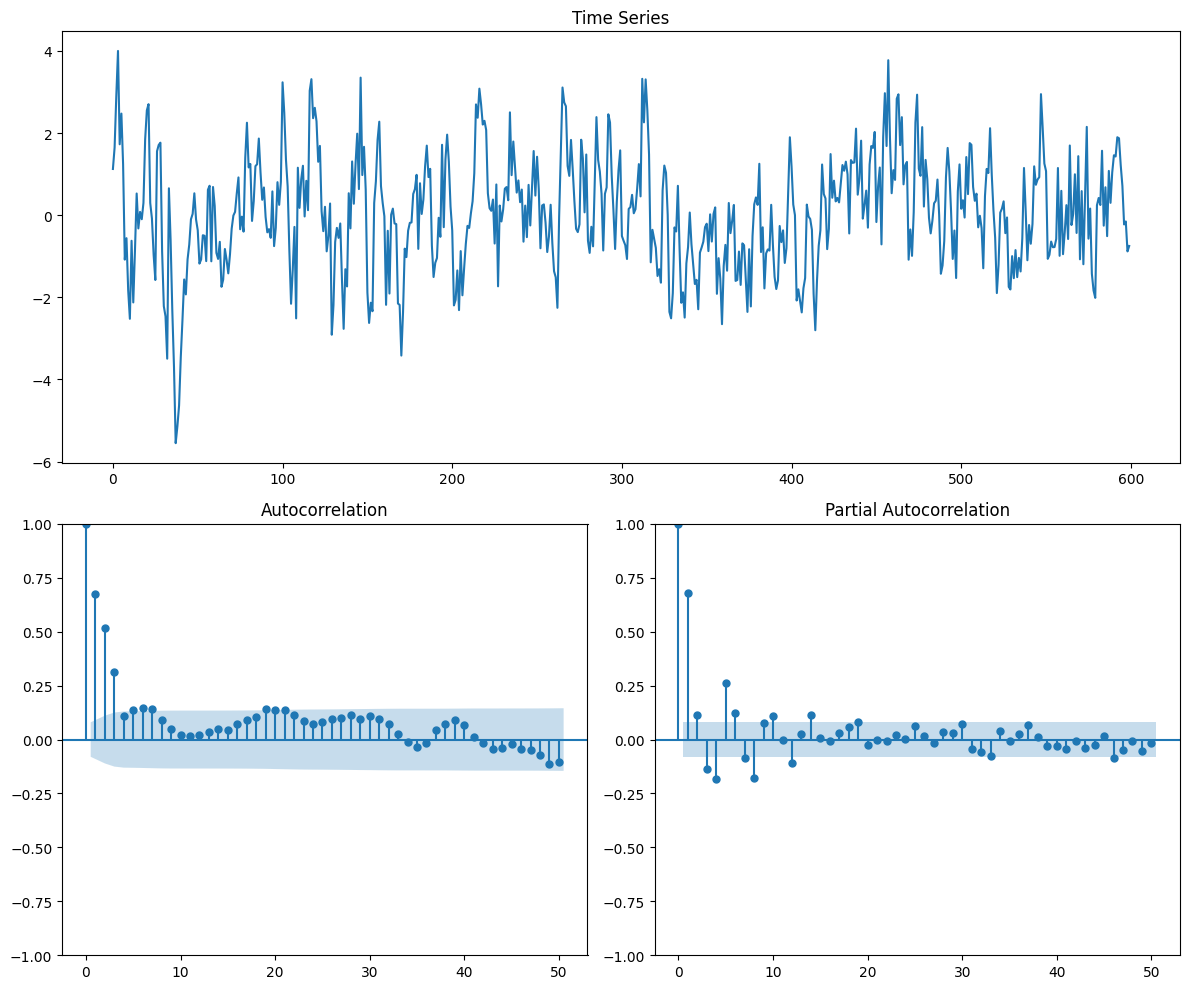

In [15]:
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7, 0.5]
ma3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma3_data)

- `Normalmente, la ACF define bien la correlación serial del error y, por tanto, se utiliza para detectar` $MA(q)$; sin embargo, a medida que aumenta el orden y entran en escena otros componentes de la serie temporal, como la estacionalidad, tendencia o estacionariedad, la interpretación se complica. El $MA(q)$ `supone que el proceso es estacionario y que el error es un ruido blanco para garantizar una estimación insesgada`.

- Se puede construir un modelo $MA(q)$ utilizando la función `ARIMA` del módulo `statsmodel.tsa`. Nótese que `usamos siempre cero en la segunda componente de la función ARIMA`, en la siguiente sección explicaremos el por qué de esto, al introducir el concepto de `diferenciación`. Un script de ejemplo para ajustar un modelo $MA(1)$ es el siguiente

In [16]:
ma1 = smtsa.ARIMA(ma1_data.tolist(), order=(0, 0, 1)).fit()

- Como el orden de $AR$ se mantiene en cero, `smtsa.ARIMA` construye un $MA(1)$. El resumen del modelo devuelto por `smtsa.ARMA` se muestra aquí

In [17]:
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -864.458
Date:                Fri, 31 Mar 2023   AIC                           1734.916
Time:                        14:26:30   BIC                           1748.107
Sample:                             0   HQIC                          1740.051
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1800      0.070     -2.567      0.010      -0.317      -0.043
ma.L1          0.6848      0.029     23.624      0.000       0.628       0.742
sigma2         1.0435      0.061     17.195      0.000       0.925       1.162
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.38   Prob(JB):                         0.83
Heteroskedasticity (H):               1.09   Skew:                            -0.06
Prob(H) (two-sided):                  0.54   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- `Queda como ejercicio para el estudiante interpretar cada summary() basado en el análisis realizado para los modelos AR`. Como puede verse, el modelo ha captado una `correlación entre los residuos, que es bastante cercano al valor simulado de 0.7`. Del mismo modo, ejecutamos el modelo para el conjunto de datos $MA(3)$ y el resultado se muestra a continuación

In [18]:
ma3 = smtsa.ARIMA(ma3_data.tolist(), order=(0, 0, 3)).fit()

In [19]:
ma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -799.358
Date:                Fri, 31 Mar 2023   AIC                           1608.717
Time:                        14:26:30   BIC                           1630.701
Sample:                             0   HQIC                          1617.275
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0428      0.108      0.397      0.691      -0.168       0.254
ma.L1          0.6034      0.035     17.320      0.000       0.535       0.672
ma.L2          0.7196      0.030     23.933      0.000       0.661       0.778
ma.L3          0.5588      0.033     16.900      0.000       0.494       0.624
sigma2         0.8382      0.049     17.013      0.000       0.742       0.935
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.76   Prob(JB):                         0.90
Heteroskedasticity (H):               0.79   Skew:                             0.04
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- Nótese también que `el modelo ha captado correlaciones entre los residuos, que están bastante cercanas a los valores simulados 0.6, 0.7 y 0.5`. 

## Creación de conjuntos de datos con ARIMA

- Las dos secciones anteriores describen el modelo autorregresivo $AR(p)$, que realiza una `regresión sobre sus propios términos rezagados` y el modelo de media móvil $MA(q)$ construye una `función en términos de errores pasados`. Los modelos $AR(p)$ tienden a `captar el efecto de reversión a la media (mean reversion)`, mientras que los modelos $MA(q)$ `tienden a captar el efecto de choque en el error`, que no son normales o imprevistos. *La reversión a la media es un término financiero para la suposición de que el precio de un activo tenderá a converger al precio promedio a lo largo del tiempo*. Así pues, `el modelo` $ARMA$ `combina la potencia de los componentes` $AR$ `y` $MA$. Un modelo de previsión de series temporales $ARMA(p, q)$ incorpora el modelo $AR$ de orden $p$ y el modelo $MA$ de orden $q$, respectivamente.

- El modelo $ARMA(1, 1)$ se denota de la siguiente manera:

$$
y_{t}=\alpha+\phi_{1}y_{t-1}-\theta_{1}\varepsilon_{t-1}+\varepsilon_{t}
$$

- El modelo $ARMA(1, 2)$ se denota de la siguiente manera:

$$
y_{t}=\alpha+\phi_{1}y_{t-1}-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}+\varepsilon_{t}
$$

- El modelo $ARMA(p, q)$ se denota como sigue:

$$
y_{t}=\alpha+\phi_{1}y_{t-1}+\phi_{2}y_{t-2}+\cdots+\phi_{p}y_{t-p}-\theta_{1}\varepsilon_{t-1}-\theta_{2}\varepsilon_{t-2}-\cdots-\theta_{q}\varepsilon_{t-q}+\varepsilon_{t}
$$

- Aquí, $\Phi$ y $\Theta$ `representan los coeficientes` $AR$ y $MA$. `Los coeficientes` $\alpha$ y $\varepsilon_{t}$ `capturan el intercepto y el error en el tiempo` $t$. La forma se expande mas a medida que aumentan $p$ y $q$; por lo tanto, se utilizan operadores de retardo para una representación concisa de los modelos $ARMA$. Supongamos que $L$ `representa el operador de retardo` y, en función de la unidad desplazada, lo aplicamos $k$ veces. Estos operadores también son denominados `operadores de desplazamiento hacia atrás`.

$$
\begin{align*}
Ly_{t}&=y_{t-1}\\
L^{2}y_{t}&=y_{t-2}\\
&\vdots\\
L^{p}y_{t}&=y_{t-p}\\
\end{align*}
$$

- Utilizando un operador de retardo, `podemos reescribir los modelos autorregresivos de primer orden de la siguiente manera`:

$$
AR(1):\quad (1-\phi L)y_{t}=\varepsilon_{t}
$$

- Del mismo modo, la ecuación de primer orden móvil puede escribirse como sigue:

$$
MA(1):\quad y_{t}=(1-\theta L)\varepsilon_{t}
$$

- Las ecuaciones anteriores pueden ampliarse para modelos $AR$ y $MA$ de orden superior:

$$
AR(p):\quad (1-\phi_{1}L-\phi_{2}L-\cdots-\phi_{p}L^{p})y_{t}=\varepsilon_{t}
$$

$$
MA(q):\quad y_{t}=(1-\theta_{1}L-\theta_{2}L^{2}-\cdots-\theta_{q}L^{q})\varepsilon_{t}
$$

- Las dos expresiones anteriores pueden combinarse para formar $ARMA$. Las representaciones anteriores también se utilizan para estudiar las funciones `impulso-respuesta`. La función de impulso-respuesta captan el efecto sobre la respuesta para $y_{t}$ dado un choque en el tiempo $l$ donde $l<t$. El impulso-respuesta también puede considerarse como un `efecto sobre la respuesta del sistema dinámico ante un cambio externo`.

- Vamos a generar un conjunto de datos $ARMA(1,1)$ actualizando el script utilizado anteriormente con componentes `AR` y `MA` actualizados. También restringiremos el número de muestras a 600 para simplificar:

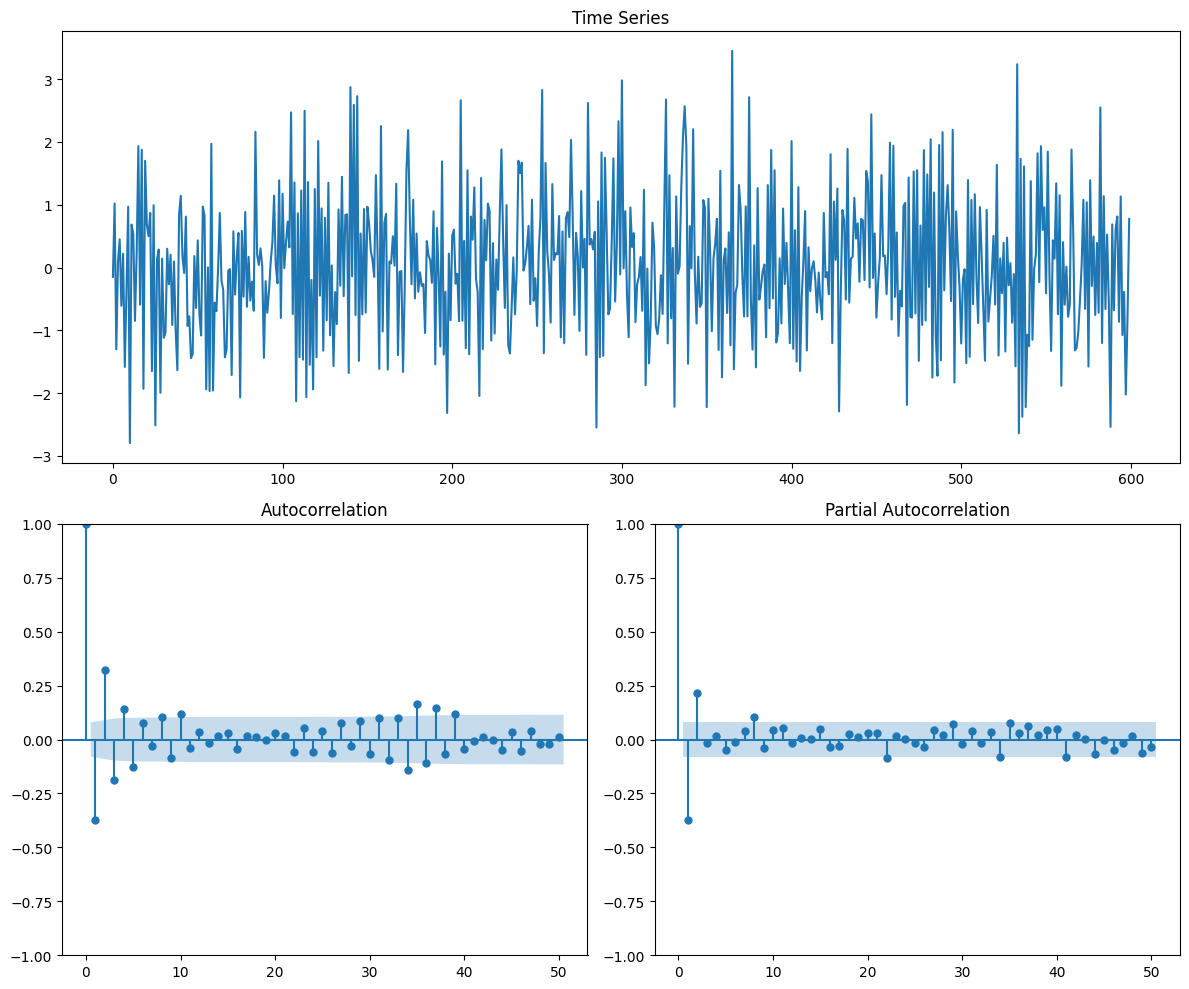

In [20]:
n = 600
ar = np.r_[1, 0.6]
ma = np.r_[1, 0.3]
ar1ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ar1ma1_data)

- Podemos utilizar el test de `Dickey Fuller`, considerando como hipótesis nula $H_{0}$: `la serie de tiempo no es estacionaria`. Como es usual, este tipo de tests entrega un $p$-value en el cual basamos la decisión de aceptar o rechazar la hipótesis inicial, con una significancia $\alpha$ de 0.05. Esto puede ser llevado a cabo usando la función `adfuller()` de `stattools`. 

In [21]:
from statsmodels.tsa import stattools

In [22]:
adf_result = stattools.adfuller(ar1ma1_data, autolag='AIC')
print('p-value of the ADF test in air miles flown:', adf_result[1])

p-value of the ADF test in air miles flown: 3.9400149988463465e-29


- La palabra clave argumento `autolag='AIC'` indica a la función que `el número de rezagos se elija para minimizar el criterio de información correspondiente`.

- Los `procesos de ventas` en general siguen un modelo $ARMA(1,1)$, ya que las ventas en el tiempo $t$ son función de las ventas anteriores que se produjeron en el tiempo $t-1$, que interviene en el componente $AR$. El componente $MA$ de $ARMA(1,1)$ se debe a las `campañas temporales lanzadas por la empresa`, como la distribución de cupones. La distribución de cupones, por ejemplo, `provocará un efecto de media móvil en el proceso`. Las ventas aumentan temporalmente y el cambio en el efecto de las ventas es captado por el componente de media móvil. En la figura anterior, tanto `ACF` como `PACF` muestran una curva senoidal con una fuerte correlación en los rezagos iniciales; por lo tanto, los parámetros $p$ como $q$ están presentes. `Existen múltiples escenarios para seleccionar` $p$ `y` $q$; algunas de las reglas generales que pueden utilizarse para determinar el orden de los componentes $ARMA$ son las siguientes:

    - La autocorrelación es exponencialmente decreciente y `PACF` tiene una correlación significativa en el retardo 1, utilice el parámetro $p$
    - La autocorrelación forma una onda senoidal y `PACF` tiene una correlación significativa en los retardos 1 y 2, entonces utilice el valor de segundo orden para $p$.
    - La autocorrelación  muestra una correlación en serie significativa y la `PACF` tiene decaimiento exponencial, entonces hay media móvil y es necesario establecer el parámetro $q$
    - La autocorrelación muestra una correlación en serie significativa y la `PACF` muestra un patrón de onda senoidal, se debe establecer un parámetro $q$ de media móvil.

- En los datos de series temporales $ARMA(1,1)$, tanto `ACF` como `PACF` han mostrado un `patrón de onda senoidal`, $p$ y $q$ afectan a la señal de la serie temporal. El impacto de los retardos puede puede calcularse mediante la curva impulso-respuesta (ver [statsmodels.tsa.arima_process.arma_impulse_response](https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_process.arma_impulse_response.html)), como se muestra en la siguiente figura, para la señal de serie temporal $ARMA(1,1)$. `La figura muestra que, tras cinco retardos, el efecto sobre la respuesta es mínimo`

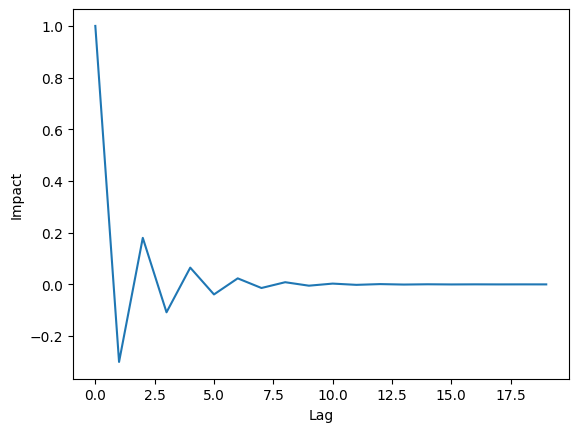

In [23]:
from statsmodels.tsa import arima_process

plt.plot(arima_process.arma_impulse_response(ar, ma, leads=20))
plt.ylabel("Impact");
plt.xlabel("Lag");

- Para evaluar los valores `AR` y `MA` de los datos, se utiliza la función `ARIMA.fit()` del módulo `statsmodels.tsa.api`, como se muestra en el siguiente script:

In [24]:
ar1ma1 = smtsa.ARIMA(ar1ma1_data.tolist(), order=(1, 0, 1)).fit()
ar1ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -869.166
Date:                Fri, 31 Mar 2023   AIC                           1746.333
Time:                        14:26:31   BIC                           1763.921
Sample:                             0   HQIC                          1753.179
                                - 600                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0400      0.035      1.129      0.259      -0.029       0.109
ar.L1         -0.7511      0.060    -12.437      0.000      -0.870      -0.633
ma.L1          0.4493      0.080      5.591      0.000       0.292       0.607
sigma2         1.0607      0.062     17.058      0.000       0.939       1.183
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 4.12
Prob(Q):                              0.65   Prob(JB):                         0.13
Heteroskedasticity (H):               0.95   Skew:                             0.20
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- El resultado del modelo muestra `valores del coeficientes` $AR$ y $MA$ `cercanos de los valores 0.6 y 0.3` utilizados por el componente $AR$ y $MA$, respectivamente, para generar la señal de la serie temporal. Asimismo, el `Criterio de información de Akaike (AIC)` lo usamos como criterio para `establecer una evaluación para las órdenes` $p$ y $q$. Una ilustración de la minimización del $AIC$ en el conjunto de datos $ARMA(1,1)$ se muestra a continuación:

In [25]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(1,3):
        arma_obj = smtsa.ARIMA(ar1ma1_data.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,1,1746.332909
1,1,2,1745.949231
2,2,1,1745.075019
3,2,2,1746.912381


- La tabla anterior muestra que $ARMA(2, 1)$ es el modelo más óptimo con un valor $AIC$ mínimo; por lo tanto, se preferirá $ARMA(2, 1)$ a otros modelos. Ilustremos un modelo $ARMA$ utilizando datos de series en tiempo real. El conjunto de datos seleccionado para la siguiente ilustración, corresponde a los `precios de las acciones de IBM de 1962 a 1965`. El primer paso consiste en cargar los módulos y el conjunto de datos en el entorno `Python`.

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm

In [27]:
ibm_df = pd.read_csv('datasets/ibm-common-stock-closing-prices.csv')
ibm_df.rename(columns={'IBM common stock closing prices': 'Close_Price'}, inplace=True)
ibm_df=ibm_df.dropna()
ibm_df.head()

,Date,Close_Price
0,1962-01-02,572.00
1,1962-01-03,577.00
2,1962-01-04,571.25
3,1962-01-05,560.00
4,1962-01-08,549.50


- El script anterior utiliza `pandas` para cargar el conjunto de datos. Los nombres de las columnas se renombran utilizando la función `rename` soportada por `pandas DataFrame`. El conjunto de datos tiene el siguiente aspecto:

- El gráfico `IBM muestra una tendencia significativa de los datos a lo largo del tiempo`. El siguiente paso en el proceso es observar los gráficos de `ACF` y `PACF` los cuales pueden obtenerse utilizando la función `plotds` definida anteriormente 

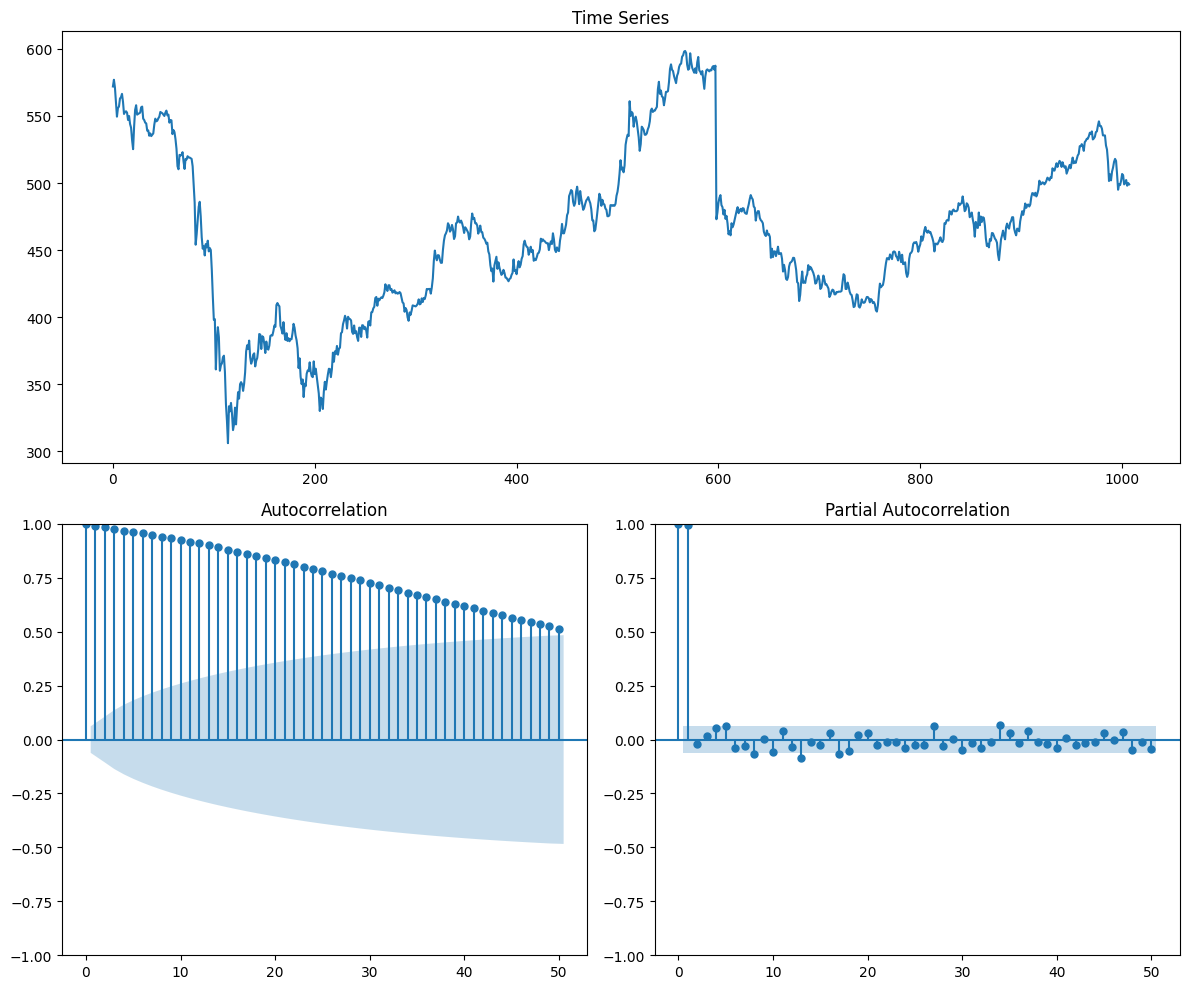

In [28]:
plotds(ibm_df.Close_Price)

- La `ACF decae linealmente, mostrando una fuerte correlación en serie`; sin embargo, la `autocorrelación parcial sólo muestra una autocorrelación positiva significativa`, la corrección debe hacerse utilizando el componente $AR$ con correlación de primer orden. El gráfico `QQ` de la señal ayuda a evaluar el supuesto de normalidad. El `QQ-plot` para el conjunto de datos de acciones de IBM se muestra en la siguiente figura

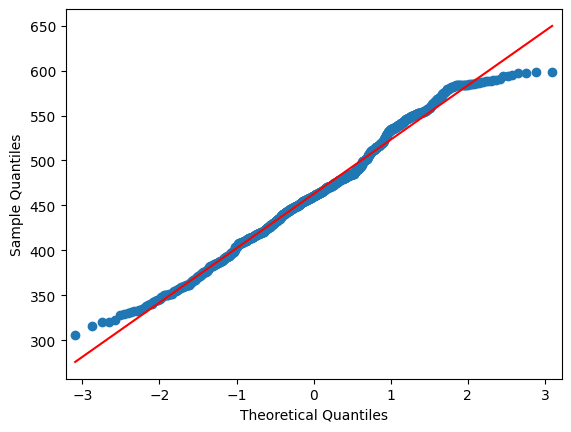

In [29]:
sm.qqplot(ibm_df['Close_Price'], line='s');

- La figura anterior muestra que el conjunto de datos se aproxima a las curvas de campana, con `casos extremos que no siguen una distribución normal`.

- Para `obtener los órdenes` $p$ `y` $q$ `óptimos para` $ARMA$, se realiza una `búsqueda en red (GridSearch)` con la minimización del $AIC$ como criterio de búsqueda utilizando el siguiente script

In [30]:
aicVal=[]

for ari in range(1, 3):
    for maj in range(0,3):
        arma_obj = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(ari, 0, maj)).fit()
        aicVal.append([ari, maj, arma_obj.aic])

In [31]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'MA(q)', 'AIC'])
dfAIC

,AR(p),MA(q),AIC
0,1,0,6697.784241
1,1,1,6699.670009
2,1,2,6701.984008
3,2,0,6699.671126
4,2,1,6700.721949
5,2,2,6702.721949


- Para obtener la fila con el `menor valor de AIC usamos`

In [32]:
dfAIC.nsmallest(n=1, columns="AIC")

,AR(p),MA(q),AIC
0,1,0,6697.784241


- La función `ARIMA.fit` se utiliza para ajustar el modelo de previsión $ARMA$ con $p$ y $q$ definidos `utilizando el criterio de máxima verosimilitud`. El $AIC$ recomienda el modelo $ARMA(1, 0)$ como `modelo óptimo con el mínimo valor de` $AIC$, aunque también puede utilizarse el modelo $ARMA(1, 1)$ dado que el $AIC$ es bastante similar. El modelo $ARMA(1, 0)$ se reajusta como modelo óptimo utilizando el siguiente script

In [33]:
arma_obj_fin = smtsa.ARIMA(ibm_df.Close_Price.tolist(), order=(1, 0, 0)).fit()
ibm_df['ARMA']=arma_obj_fin.predict()

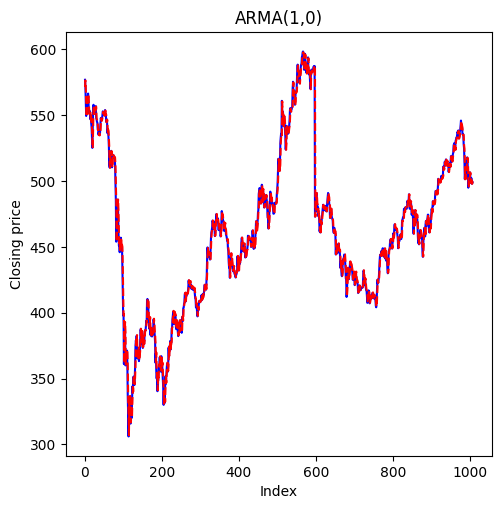

In [34]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,0)')
plt.xlabel('Index')
plt.ylabel('Closing price');

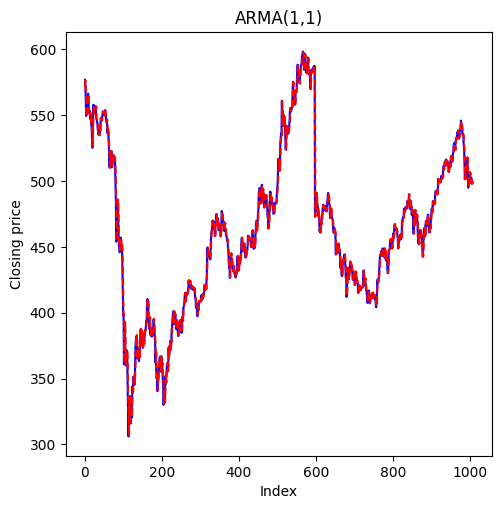

In [35]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
ibm_df['Close_Price'].iloc[1:].plot(color='b', linestyle = '-', ax=axarr)
ibm_df['ARMA'].iloc[1:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARMA(1,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

- Una de las principales limitaciones de estos modelos es que `ignoran el factor de volatilidad, lo que hace que la señal no sea estacionaria`. El modelo $AR$ considera un proceso estacionario, es decir, el término de error es `iid` y sigue una distribución normal $\varepsilon_{t} \sim N(0, \sigma_{\epsilon}^{2})$ y $|\phi|<1$. `La condición` $|\phi|<1$ `hace que la serie temporal sea una serie temporal finita ya que el efecto de las observaciones más recientes en la serie temporal sería mayor en comparación con las observaciones anteriores`. Las series que no satisfacen estos supuestos caen en series no estacionarias.

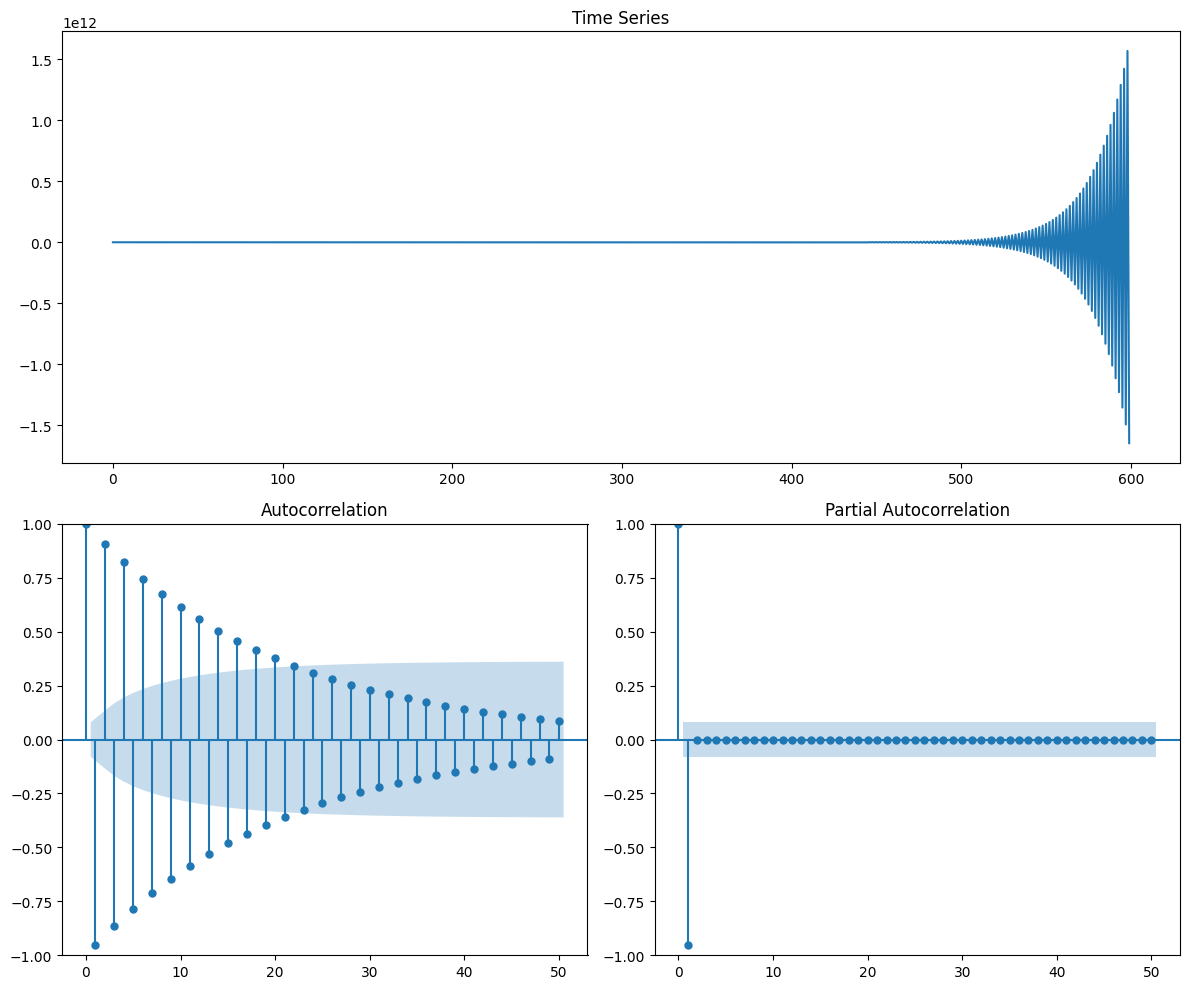

In [36]:
ar = np.r_[1, 1.05]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

- Del gráfico anterior se desprende que `la varianza del proceso sigue aumentando al final del conjunto de datos y se observa una fuerte tendencia en la ACF`. El modelo `ARIMA` que se analiza en la sección siguiente tiene en cuenta escenarios no estacionarios para la predicción.

## ARIMA

- $ARIMA$, también conocido como `modelo Box-Jenkins`, es una generalización del modelo $ARMA$ `incluyendo componentes integrados`. Los componentes integrados son útiles cuando los datos son `no estacionarios`, y la parte integrada del $ARIMA$ ayuda a `reducir la no estacionariedad`. $ARIMA$ `aplica la diferenciación a las series temporales una o más veces para eliminar el efecto de no estacionariedad`. Los ordenes $p, d, q$ del modelo $ARIMA(p, d, q)$ representan el orden de los componentes $AR$, de `diferenciación` y $MA$.

- La principal diferencia entre los modelos $ARMA$ y $ARIMA$ es el componente $d$, que actualiza la serie sobre la que se construye el modelo de predicción. El componente $d$ `tiene por objeto hacer la serie estacionaria` y de esta forma el modelo $ARMA$ puede aplicarse al conjunto de datos sin tendencia. Para distintos valores de $d$, la respuesta de la serie cambia del siguiente modo

$$
\begin{align*}
\text{Para}\quad d&=0:\quad x_{t}=x_{t}\\
\text{Para}\quad d&=1:\quad x_{t}=x_{t}-x_{t-1}\\
\text{Para}\quad d&=2:\quad x_{t}=(x_{t}-x_{t-1})-(x_{t-1}-x_{t-2})=x_{t}-2x_{t-1}-x_{t-2}\\
\end{align*}
$$

- Como se desprende de las líneas anteriores, la segunda diferencia no es de hace dos periodos, sino que es la diferencia entre la primera diferencia, es decir, $d=1$. Digamos que $\hat{x}_{t}$ `representa la respuesta diferenciada`, entonces, la predicción por $ARIMA$ puede escribirse de la siguiente manera:

$$
x_{t}=\phi_{1}\hat{x}_{t-1}+\phi_{2}\hat{x}_{t-2}+\cdots+\phi_{p}\hat{x}_{t-p}+\theta_{1}\varepsilon_{t-1}+\theta_{2}\varepsilon_{t-2}+\cdots+\theta_{q}\varepsilon_{t-q}+\varepsilon_{t}
$$

- Dependiendo del orden de $p, d$ y $q$, el modelo se comporta de forma diferente. Por ejemplo, $ARIMA(1, 0, 0)$ es un modelo $AR$ de primer orden. Del mismo modo, $ARIMA(0, 0, 1)$ es un modelo $MA$ de primer orden. Tomemos un ejemplo de $ARIMA(0, 1, 0)$ para ilustrar los distintos componentes del modelo $ARIMA$. El $ARIMA(0, 1, 0)$ `representa un modelo de paseo aleatorio`. El modelo de paseo aleatorio depende únicamente de la última instancia temporal y puede representarse de la siguiente manera:

$$
x_{t}=x_{t-1}+\varepsilon_{t}
$$

- La ecuación de `paseo aleatorio` anterior también puede representarse usando operadores de retardo de la siguiente manera

$$
(1-L)x_{t}=\varepsilon_{t}
$$

- Aquí, $\varepsilon_{t} \sim N(0, \sigma^{2})$ es el componente de error y sigue una distribución normal. Si se añade una constante al modelo de paseo aleatorio precedente causará un `desplazamiento en el modelo, que también es de naturaleza estocástica` como en la siguiente ecuación:

$$
(1-L)x_{t}=\alpha+\varepsilon_{t}
$$

- Aquí, $\alpha$ es el operador de desplazamiento que dará un efecto de desviación a las señales de las series temporales. Ilustremos un modelo $ARIMA$ utilizando el conjunto de datos de series temporales de los índices `Dow Jones (DJIA)` de 2016. El conjunto de datos `DJIA` con sus gráficos `ACF` y `PACF` básicos se muestra en la siguiente figura

In [37]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smtsa

In [38]:
djia_df = pd.read_excel('datasets/DJIA_Jan2016_Dec2016.xlsx')
djia_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
1,2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2,2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
3,2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
4,2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


- Analicemos la columna *Date* y utilicémosla como índice de fila para el *DataFrame* y utilicemosla como columna

In [39]:
djia_df['Date'] = pd.to_datetime(djia_df['Date'], '%Y-%m-%d')
djia_df.index = djia_df['Date']
djia_df.drop('Date', axis=1, inplace=True)
djia_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,17405.480469,17405.480469,16957.630859,17148.939453,17148.939453,148060000
2016-01-05,17147.500000,17195.839844,17038.609375,17158.660156,17158.660156,105750000
2016-01-06,17154.830078,17154.830078,16817.619141,16906.509766,16906.509766,120250000
2016-01-07,16888.359375,16888.359375,16463.630859,16514.099609,16514.099609,176240000
2016-01-08,16519.169922,16651.890625,16314.570313,16346.450195,16346.450195,141850000


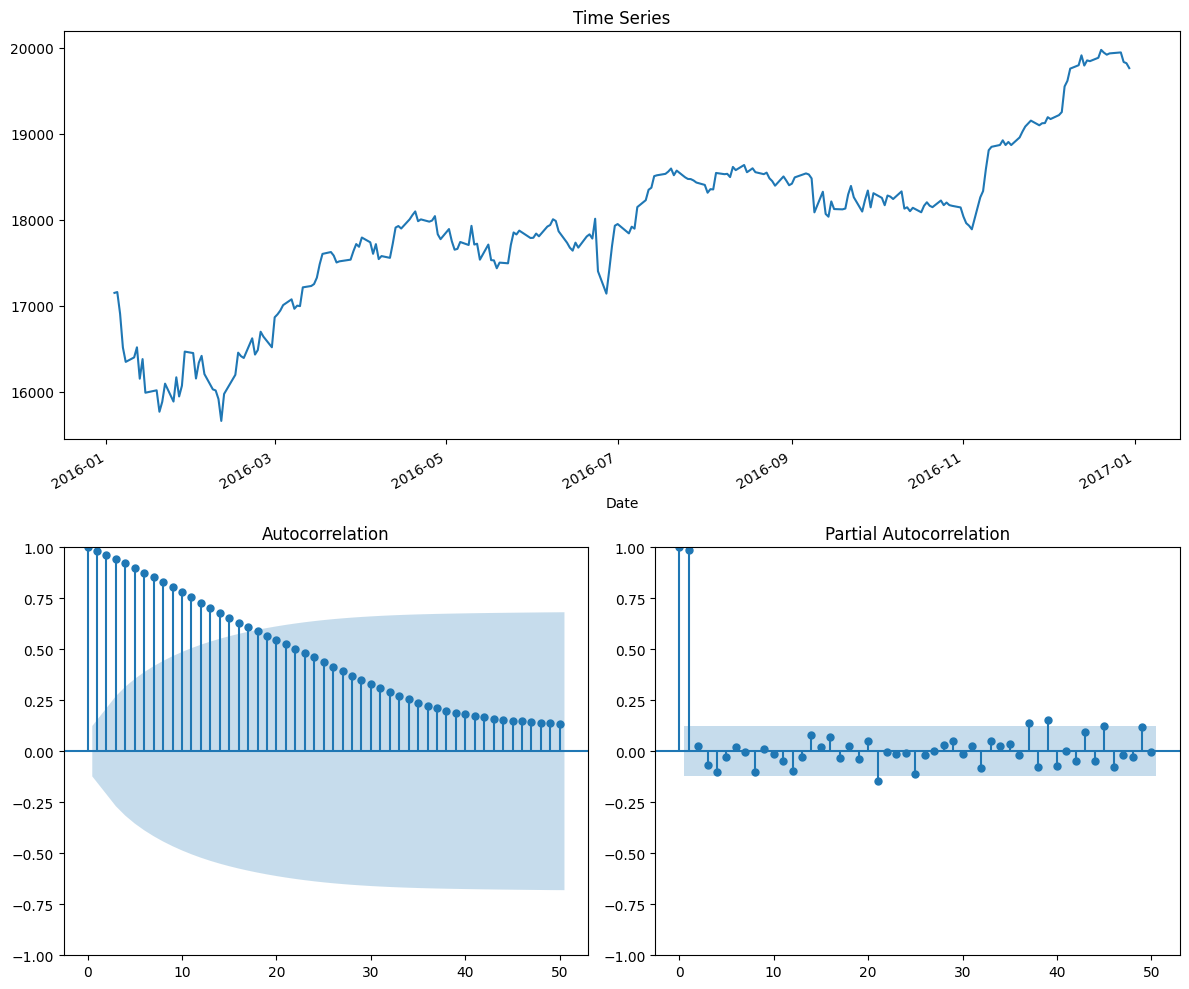

In [40]:
djia_df=djia_df.dropna()
plotds(djia_df['Close'], nlag=50)

- El conjunto de datos muestra claramente una señal no estacionaria con una tendencia creciente. El `ACF` también muestra un decaimiento exponencial, mientras que la `PACF` tiene una fuerte correlación en el retardo 2. `La no estacionariedad también puede comprobarse evaluando la media y la varianza en distintos periodos de tiempo. La diferencia en la media y la varianza valida la hipótesis de no estacionariedad`. Por ejemplo, dividimos el conjunto de datos del `DJIA` en dos semestres, de enero a junio de 2016 y de julio a diciembre de 2016, y evaluamos la media y la varianza para cada semestre del siguiente modo:

In [41]:
mean1, mean2 =djia_df.iloc[:125].Close.mean(), djia_df.iloc[125:].Close.mean()
var1, var2 = djia_df.iloc[:125].Close.var(), djia_df.iloc[125:].Close.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=17226.579164, mean2=18616.603593
variance1=487045.734003, variance2=325183.639530


- `La media y la varianza evaluadas para ambos semestres muestran una diferencia significativa en los valores de la media y la varianza, lo que sugiere que los datos no son estacionarios`. Otra forma de evaluar la no estacionariedad es utilizar pruebas estadísticas como la prueba de `Dickey-Fuller (ADF)`. El $ADF$ es una prueba de raíz unitaria que `evalúa la fuerza de la tendencia en una componente de la serie temporal`.

- En otras palabras, `la hipótesis nula es la presencia de la raíz unitaria o no estacionariedad mientras que la hipótesis alternativa sugiere la estacionariedad de los datos`. Realicemos la prueba `ADF` para el conjunto de datos `DJIA`:

In [42]:
from statsmodels.tsa.stattools import adfuller

In [43]:
adf_result= adfuller(djia_df.Close.tolist())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

ADF Statistic: -0.462320
p-value: 0.899162


- Idealmente, `un valor más negativo del estadístico ADF representará una señal estacionaria`. Para el conjunto de datos, como el valor $p$ `es bastante alto, no podemos rechazar la hipótesis nula`, lo que la convierte en una señal no estacionaria. La mayoría de los paquetes garantizan la estacionariedad antes de ejecutar los modelos. En la figura siguiente se muestra el gráfico `qqplot` para visualizar la normalidad del conjunto de datos *DJIA*. La normalidad también puede evaluarse mediante la prueba de `Shapiro-wilk`

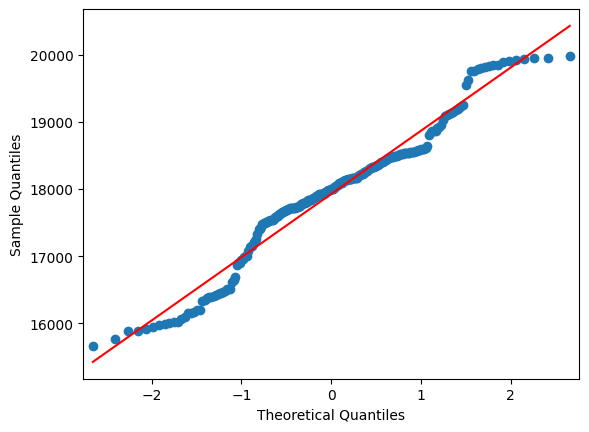

In [44]:
sm.qqplot(djia_df['Close'], line='s');

- La figura anterior muestra `no normalidad significativa en el conjunto de datos` del `DJIA`. La mayoría de los paquetes escritos en `Python` comprueban la estacionariedad de un conjunto de datos. `La diferenciación ayudará a que la señal sea estacionaria`. Tracemos las series temporales originales y las de primera diferencia

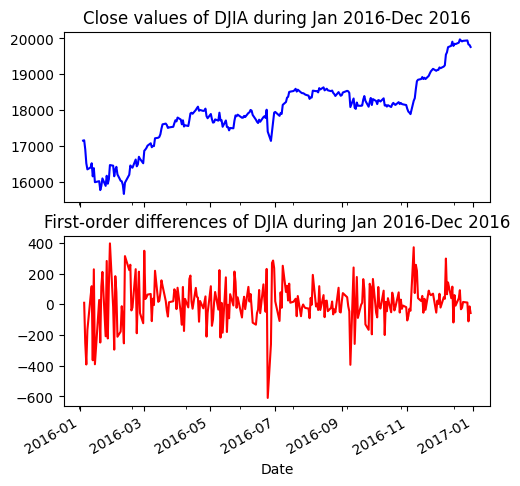

In [45]:
first_order_diff = djia_df['Close'].diff(1).dropna()
fig, ax = plt.subplots(2, sharex=True)
fig.set_size_inches(5.5, 5.5)
djia_df['Close'].plot(ax=ax[0], color='b')
ax[0].set_title('Close values of DJIA during Jan 2016-Dec 2016')
first_order_diff.plot(ax=ax[1], color='r')
ax[1].set_title('First-order differences of DJIA during Jan 2016-Dec 2016');

ADF Statistic: -17.135094
p-value: 0.000000


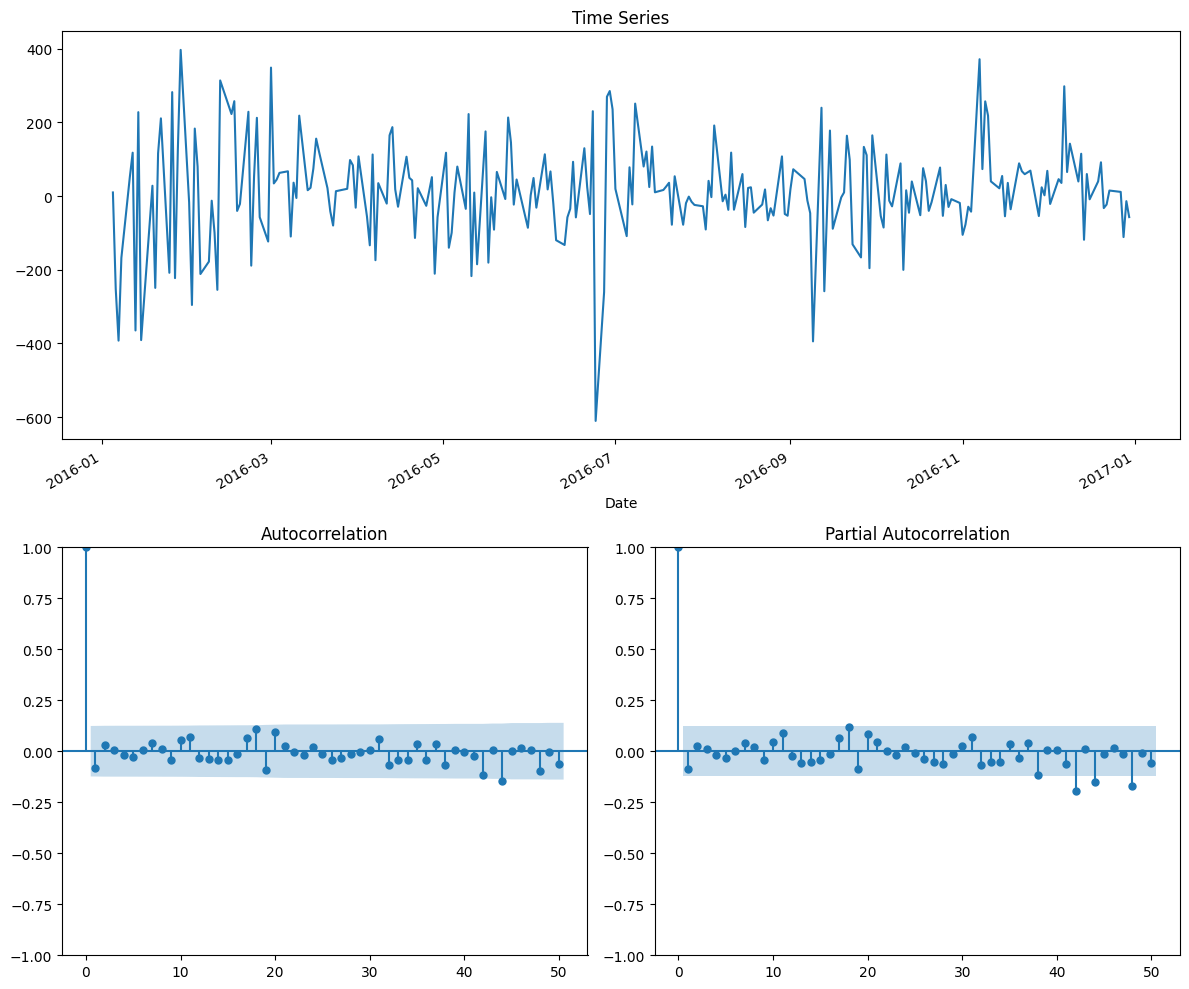

In [46]:
plotds(first_order_diff, nlag=50)
adf_result= adfuller(first_order_diff)
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])

- El estadístico ADF de los residuos tiene un valor de -17.135094 con un valor $p=0.000000$, lo que indica que `la serie de tiempo es estacionaria`; sin embargo, tanto la `ACF` como el `PACF` `no muestran mucha tendencia del componente de media móvil, mostrando un comportamiento de paseo aleatorio`. Además, otra forma de ejecutar es `optimizar utilizando AIC como criterio`

In [47]:
aicVal=[]
for d in range(1,3):
    for ari in range(0, 3):
        for maj in range(0,3):
            try:
                arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(ari, d, maj))
                arima_obj_fit=arima_obj.fit()
                aicVal.append([ari, d, maj, arima_obj_fit.aic])
            except ValueError:
                pass

In [48]:
dfAIC = pd.DataFrame(aicVal, columns=['AR(p)', 'd', 'MA(q)', 'AIC'])
dfAIC

,AR(p),d,MA(q),AIC
0,0,1,0,3182.101860
1,0,1,1,3182.670296
2,0,1,2,3184.581580
3,1,1,0,3182.624230
4,1,1,1,3184.571180
5,1,1,2,3186.467647
6,2,1,0,3184.573347
7,2,1,1,3186.447498
8,2,1,2,3188.433187
9,0,2,0,3362.452244


In [49]:
print('Best ARIMA parameters based on AIC:\n')
dfAIC[dfAIC.AIC == dfAIC.AIC.min()]

Best ARIMA parameters based on AIC:



,AR(p),d,MA(q),AIC
10,0,2,1,3181.46016


- Elejimos $ARIMA(0, 2, 1)$ para el ajuste y la evaluación del modelo, por contar con el menor $AIC$. $ARIMA(0, 2, 1)$ aplica una `diferenciación de segundo orden y un componente de media móvil de primer orden` para determinar la relación entre las observaciones. El parámetro del modelo se configura como se muestra en el siguiente script

In [50]:
arima_obj = smtsa.ARIMA(djia_df['Close'].tolist(), order=(0, 2, 1))
arima_obj_fit = arima_obj.fit()
arima_obj_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  252
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1588.730
Date:                Fri, 31 Mar 2023   AIC                           3181.460
Time:                        14:26:45   BIC                           3188.503
Sample:                             0   HQIC                          3184.295
                                - 252                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9983      0.153     -6.535      0.000      -1.298      -0.699
sigma2      1.828e+04   2884.004      6.340      0.000    1.26e+04    2.39e+04
===================================================================================
Ljung-Box (L1) (Q):                   1.60   Jarque-Bera (JB):                47.47
Prob(Q):                              0.21   Prob(JB):                         0.00
Heteroskedasticity (H):               0.46   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
pred=np.append([0,0], arima_obj_fit.fittedvalues.tolist())

In [52]:
n_first = pred.shape[0] - djia_df.shape[0]
djia_df['ARIMA']=pred[n_first:]

In [53]:
diffval=np.append([0,0], arima_obj_fit.resid)
djia_df['diffval']=diffval[n_first:]

- La comparación con los valores reales y previstos se obtiene y visualiza utilizando el siguiente script

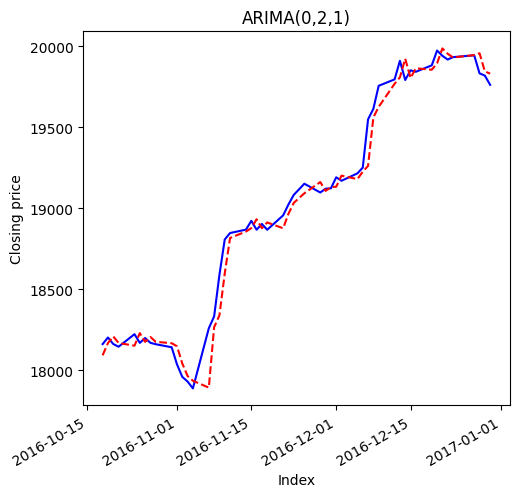

In [54]:
f, axarr = plt.subplots(1, sharex=True)
f.set_size_inches(5.5, 5.5)
djia_df['Close'].iloc[200:].plot(color='b', linestyle = '-', ax=axarr)
djia_df['ARIMA'].iloc[200:].plot(color='r', linestyle = '--', ax=axarr)
axarr.set_title('ARIMA(0,2,1)')
plt.xlabel('Index')
plt.ylabel('Closing price');

- La ampliación del modelo $ARIMA$ incluye el `componente de estacionalidad para` $AR$, $I$, y $MA$ `representado en mayúsculas`. El $ARIMA$ estacional se representa como

    $$
    ARIMA(p, d, q) (P, D, Q)_{m},
    $$

    donde $P, D$ y $Q$ `representan la parte estacional de la media autorregresiva, integrada y media móvil, respectivamente`. 
    
- La $m$ en el modelo $ARIMA$ estacional representa el `número de periodos por estación`. En los casos en los que existe estacionalidad, `pueden ser necesarios los pasos adicionales de diferencia estacional y ajuste estacional para garantizar que la señal sea estacionaria`. Por ejemplo, si se observan los gráficos de diferencia `ACF y PACF del DJIA`, la autocorrelación se vuelve ligeramente significativa en el índice 42, `lo que significa que puede haber estacionalidad`. `Un gráfico de la función de autocorrelación retardada debería mostrar una autocorrelación positiva relativamente grande en el retardo 42, con picos más pequeños en los retardos 84 y 126 (si se examina un mayor número de retardo).`. La estacionalidad está presente en la primera diferencia y puede verse utilizando las siguientes líneas de código

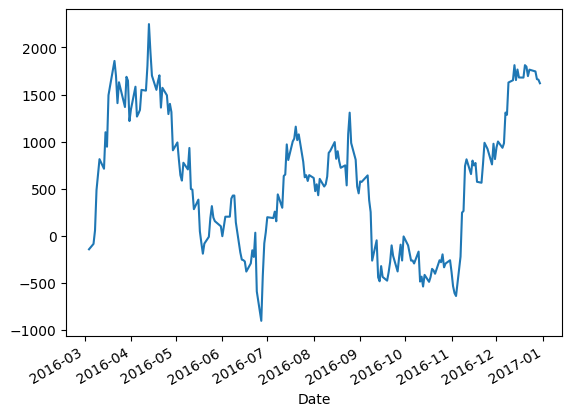

In [55]:
x=djia_df['Close']-djia_df['Close'].shift(42)
x.plot();

- La estacionalidad precedente puede corregirse utilizando $ARIMA$ estacional soportado en el modelo `statmodels.SARIMAX`. El script para configurar un modelo $ARIMA$ estacional para el conjunto de datos `DJIA` es el siguiente:

In [56]:
x=djia_df['Close']-djia_df['Close'].shift(42)
mod = sm.tsa.statespace.SARIMAX(djia_df['Close'], trend='n', order=(0, 2, 1),
seasonal_order=(1, 1, 1, 42))
sarimax= mod.fit()
sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  252
Model:             SARIMAX(0, 2, 1)x(1, 1, 1, 42)   Log Likelihood               -1366.570
Date:                            Fri, 31 Mar 2023   AIC                           2741.141
Time:                                    14:27:06   BIC                           2754.491
Sample:                                         0   HQIC                          2746.539
                                            - 252                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000     16.163     -0.062      0.951     -32.679      30.679
ar.S.L42      -0.2542      0.093     -2.727      0.006      -0.437      -0.072
ma.S.L42      -0.4671      0.130     -3.597      0.000      -0.722      -0.213
sigma2      2.355e+04    3.8e+05      0.062      0.951   -7.22e+05    7.69e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                21.28
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- El modelo muestra una `mejora significativa en términos de AIC` y puede optimizarse aún más para diferentes componentes del modelo `SARIMAX`

## Intervalo de confianza

- Una de las preguntas más frecuentes en previsión es: `¿Cuál es el intervalo de confianza de las estimaciones?` El nivel de confianza de un modelo de previsión viene definido por el parámetro $\alpha$ de la función de previsión. El valor $\alpha = 0.05$ representa una estimación con un 95% de confianza, lo que puede interpretarse como que las estimaciones devueltas por el modelo tienen una probabilidad del 5% de no caer en el intervalo de distribución definido. `El intervalo de confianza se evalúa del siguiente modo`

$$
\hat{x}_{t}\pm Z_{\alpha}\frac{\sigma}{\sqrt{N}}
$$

- Aquí, $Z_{\alpha}$ es el valor crítico definido en función de $\alpha$. Para el valor $\alpha=0.05$, el valor crítico es $1.96$. El intervalo de confianza con un valor $\alpha$ de $0.05$ para el conjunto de datos `DJIA` modelado utilizando el modelo $ARIMA(0,2,1)$ puede obtenerse utilizando la función de previsión del objeto `arima_obj_fit`

In [57]:
forecast = arima_obj_fit.get_forecast(40)
yhat = forecast.predicted_mean
yhat_conf_int = forecast.conf_int(alpha=0.05)

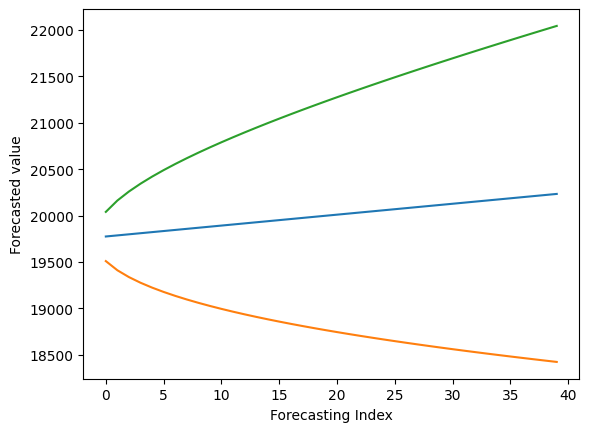

In [58]:
plt.plot(yhat)
plt.plot(yhat_conf_int)
plt.xlabel('Forecasting Index')
plt.ylabel('Forecasted value');

## Resumen

- En este capítulo, cubrimos los modelos autorregresivos como un modelo $MA$ para capturar la correlación serial utilizando la relación de error. En líneas similares, se cubrieron los modelos $AR$, que establecen la previsión utilizando los rezagos como observaciones dependientes. Los modelos $AR$ son buenos para captar información sobre tendencias. También se ilustró el enfoque basado en $ARMA$, que integra los modelos $AR$ y $MA$ para captar las tendencias temporales y los acontecimientos inesperados que provocan muchos errores que tardan en corregirse, como una crisis económica. 

- Todos estos modelos suponen estacionariedad; en los casos en los que no se da estacionariedad, se utiliza un modelo basado en la diferenciación, como el $ARIMA$, que diferencia los conjuntos de datos de series temporales para eliminar cualquier tendencia. Los métodos de previsión se ilustraron con ejemplos utilizando el módulo `tsa` de `Python`. El presente capítulo se centra en el uso de `métodos estadísticos` para la previsión. En el capítulo siguiente se ampliará el enfoque estadístico a los métodos de `aprendizaje automático` para la previsión, concretamente `modelos de aprendizaje profundo`.